<a href="https://colab.research.google.com/github/davidlealo/sic_ai_2025_sept/blob/main/3_machine_learning/contribuciones_estudiantes/prueba_recomendacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Guía Paso a Paso: K-Means Clustering y Segmentación de Clientes

## Objetivo de la clase

Aprender a usar algoritmos no supervisados, específicamente **K-Means**, para descubrir patrones ocultos en los datos. Aplicaremos este método para **segmentar clientes** y luego realizaremos nuevos ejercicios con distintos contextos y datasets.

---

## 🔧 Parte 1: Caso práctico con dataset real

### 1. Cargar y explorar el dataset

```python
import pandas as pd

url = "https://gist.githubusercontent.com/pravalliyaram/5c05f43d2351249927b8a3f3cc3e5ecf/raw/Mall_Customers.csv"
df = pd.read_csv(url)

df.head()
```

### 2. Preprocesamiento y selección de variables

```python
from sklearn.preprocessing import StandardScaler

X = df[["Age", "Annual Income (k$)", "Spending Score (1-100)"]]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
```

### 3. Método del Codo (Elbow Method)

```python
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title("Método del Codo para elegir K")
plt.xlabel("Número de Clusters")
plt.ylabel("WCSS")
plt.grid(True)
plt.show()
```

### 4. Entrenar modelo y crear clusters

```python
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(X_scaled)
```

### 5. Visualización con PCA

```python
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)
df["PCA1"], df["PCA2"] = components[:, 0], components[:, 1]

sns.scatterplot(data=df, x="PCA1", y="PCA2", hue="Cluster", palette="Set2", s=80)
plt.title("Segmentación de Clientes (K-Means + PCA)")
plt.show()
```

### 6. Interpretación y propuesta de estrategias

```python
df.groupby("Cluster")[["Age", "Annual Income (k$)", "Spending Score (1-100)"]].mean()
```



In [ ]:
import pandas as pd

url = "https://gist.githubusercontent.com/pravalliyaram/5c05f43d2351249927b8a3f3cc3e5ecf/raw/Mall_Customers.csv"
df = pd.read_csv(url)

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [ ]:
# Valores unicos de CustomerID
df['CustomerID'].nunique()

200

In [ ]:
from sklearn.preprocessing import StandardScaler

X = df[["Age", "Annual Income (k$)", "Spending Score (1-100)"]]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_scaled

array([[-1.42456879, -1.73899919, -0.43480148],
       [-1.28103541, -1.73899919,  1.19570407],
       [-1.3528021 , -1.70082976, -1.71591298],
       [-1.13750203, -1.70082976,  1.04041783],
       [-0.56336851, -1.66266033, -0.39597992],
       [-1.20926872, -1.66266033,  1.00159627],
       [-0.27630176, -1.62449091, -1.71591298],
       [-1.13750203, -1.62449091,  1.70038436],
       [ 1.80493225, -1.58632148, -1.83237767],
       [-0.6351352 , -1.58632148,  0.84631002],
       [ 2.02023231, -1.58632148, -1.4053405 ],
       [-0.27630176, -1.58632148,  1.89449216],
       [ 1.37433211, -1.54815205, -1.36651894],
       [-1.06573534, -1.54815205,  1.04041783],
       [-0.13276838, -1.54815205, -1.44416206],
       [-1.20926872, -1.54815205,  1.11806095],
       [-0.27630176, -1.50998262, -0.59008772],
       [-1.3528021 , -1.50998262,  0.61338066],
       [ 0.94373197, -1.43364376, -0.82301709],
       [-0.27630176, -1.43364376,  1.8556706 ],
       [-0.27630176, -1.39547433, -0.590

In [ ]:
%pip install estyp


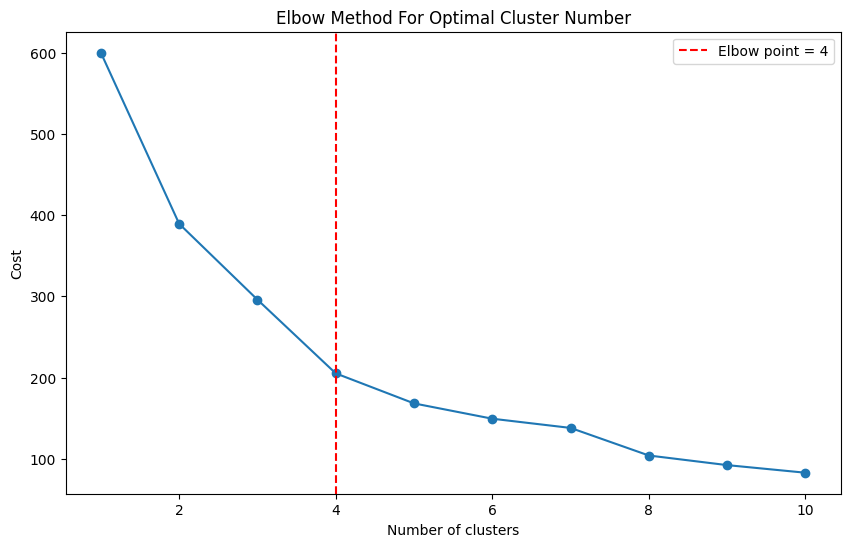

In [ ]:
from sklearn.cluster import KMeans
from estyp.cluster import NClusterSearch


searcher = NClusterSearch(estimator=KMeans(), method='elbow')
searcher.fit(X_scaled)

labels = searcher.labels_
predicted_labels = searcher.predict(X_scaled)
optimal_model = searcher.best_estimator_
optimal_clusters = searcher.optimal_clusters_

searcher.plot()

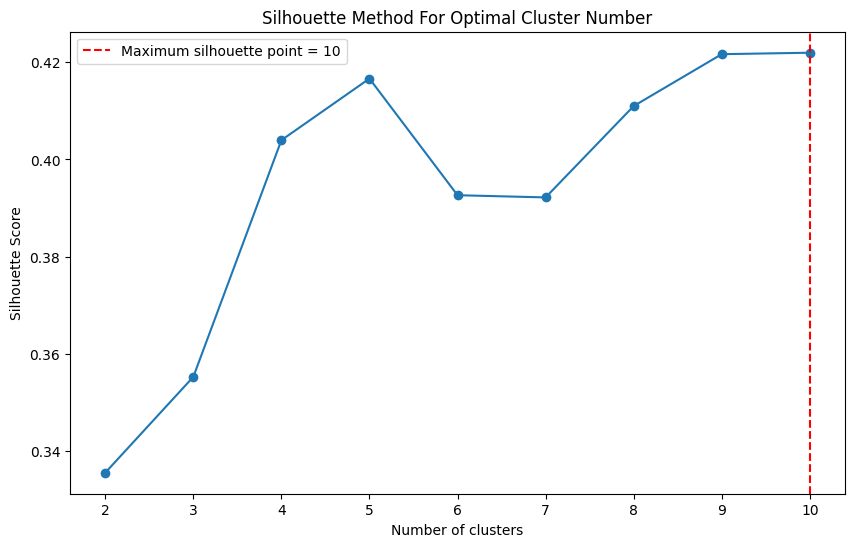

In [ ]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from estyp.cluster import NClusterSearch

searcher = NClusterSearch(estimator=KMeans(), method='silhouette')
searcher.fit(X_scaled)

labels = searcher.labels_
predicted_labels = searcher.predict(X_scaled)
optimal_model = searcher.best_estimator_
optimal_clusters = searcher.optimal_clusters_

searcher.plot()

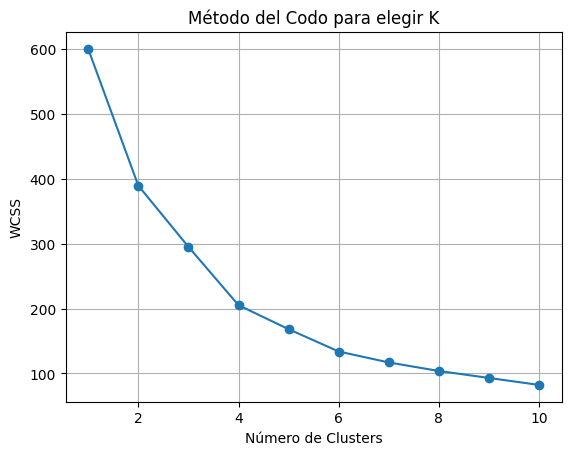

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title("Método del Codo para elegir K")
plt.xlabel("Número de Clusters")
plt.ylabel("WCSS")
plt.grid(True)
plt.show()

In [ ]:
kmeans_c = KMeans(n_clusters=4, init='k-means++', random_state=42, n_init=10)
df["Cluster"] = kmeans_c.fit_predict(X_scaled)

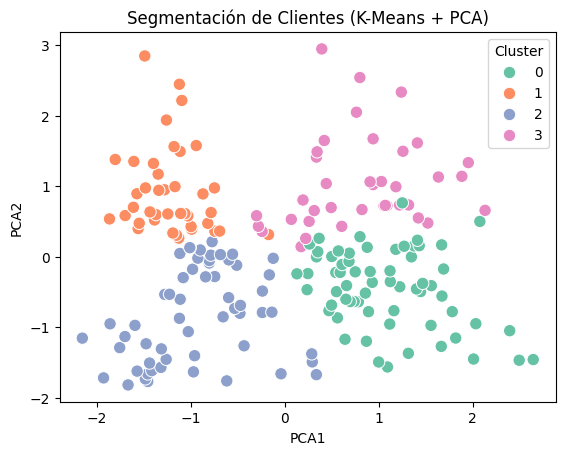

In [ ]:
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)
df["PCA1"], df["PCA2"] = components[:, 0], components[:, 1]

sns.scatterplot(data=df, x="PCA1", y="PCA2", hue="Cluster", palette="Set2", s=80)
plt.title("Segmentación de Clientes (K-Means + PCA)")
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(X_scaled)

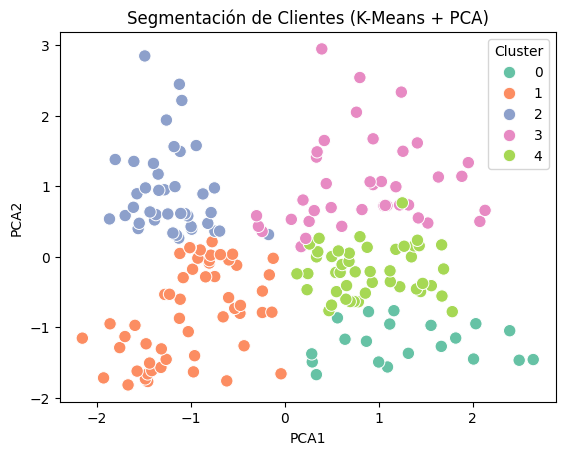

In [ ]:
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)
df["PCA1"], df["PCA2"] = components[:, 0], components[:, 1]

sns.scatterplot(data=df, x="PCA1", y="PCA2", hue="Cluster", palette="Set2", s=80)
plt.title("Segmentación de Clientes (K-Means + PCA)")
plt.show()

In [ ]:
df.groupby("Cluster")[["Age", "Annual Income (k$)", "Spending Score (1-100)"]].mean()


,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,46.250000,26.750000,18.350000
1,25.185185,41.092593,62.240741
2,32.875000,86.100000,81.525000
3,39.871795,86.102564,19.358974
4,55.638298,54.382979,48.851064


In [ ]:
df.groupby("Cluster")["Age"].count()

,Age
Cluster,
0,20
1,54
2,40
3,39
4,47


In [ ]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster,PCA1,PCA2
0,1,Male,19,15,39,1,-0.615720,-1.763481
1,2,Male,21,15,81,1,-1.665793,-1.820747
2,3,Female,20,16,6,0,0.337862,-1.674799
3,4,Female,23,16,77,1,-1.456573,-1.772430
4,5,Female,31,17,40,1,-0.038465,-1.662740
...,...,...,...,...,...,...,...,...
195,196,Female,35,120,79,2,-1.093705,2.215577
196,197,Female,45,126,28,3,0.800448,2.540748
197,198,Male,32,126,74,2,-1.119709,2.445169
198,199,Male,32,137,18,3,0.395411,2.946665


In [ ]:
df.groupby("Cluster")["CustomerID"]

---

## Parte 2: Actividades posteriores por grupos

Cada grupo debe elegir un nuevo dataset y aplicar K-Means o una técnica alternativa como DBSCAN o Agglomerative Clustering. Aquí algunos casos sugeridos:

---

### Ejercicio 1: Segmentación de vinos

- **Objetivo:** Agrupar distintos tipos de vino en función de sus características químicas.
- **Extensión:** Comparar resultados de K-Means con clustering jerárquico.

```python
from sklearn.datasets import load_wine
import pandas as pd

# Cargar datos
data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)

# (Opcional) Ver etiquetas originales (clases)
df["target"] = data.target

df.head()
```

---

### Ejercicio 2: Agrupamiento de países por desarrollo humano

- **Objetivo:** Agrupar países según indicadores como educación, ingreso, esperanza de vida.
- **Extensión:** Analizar similitudes regionales y brechas globales.

```python
import pandas as pd

url = "https://raw.githubusercontent.com/bromero26/human-development-index/master/hdi_human_development_index.csv"
df = pd.read_csv(url)

# Seleccionar columnas más recientes (por ej. 'geo', '2015' o '2019')
df = df[['geo', '2015']].dropna()
df.head()
```

---

### Ejercicio 3: Agrupamiento de canciones por características musicales

- **Objetivo:** Agrupar canciones según tempo, energía, baileabilidad, etc.
- **Extensión:** Proponer una playlist personalizada para cada cluster.

```python
import pandas as pd

url = "https://raw.githubusercontent.com/gabminamedez/spotify-data/master/data.csv"
df = pd.read_csv(url)

# Seleccionar variables musicales relevantes
df = df[["danceability","energy","tempo","valence","loudness"]].dropna()

df.head()
```

---

### Ejercicio 4: Segmentación de estudiantes

- **Objetivo:** Agrupar estudiantes según hábitos de estudio, rendimiento y contexto social.
- **Extensión:** Proponer estrategias de apoyo personalizadas para cada grupo.

```python
import pandas as pd

url = "https://raw.githubusercontent.com/yogeshsachdeva223/Student_mat_exploration_and_visualisation/main/student-mat.csv"
df = pd.read_csv(url)

# Verificar estructura
df.head()
```

---

## Recomendaciones para grupos

1. **Analicen bien las variables:** ¿Cuáles son numéricas, cuáles deben codificarse?
2. **Visualicen sus clusters:** Con `PCA`, `t-SNE` o `Seaborn pairplot`.
3. **Interpreten los resultados:** ¿Qué patrones encontraron? ¿Qué caracteriza a cada grupo?
4. **Propongan acciones concretas:** Desde marketing a intervenciones educativas.


In [ ]:
from sklearn.datasets import load_wine
import pandas as pd

# Cargar datos
data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)

# (Opcional) Ver etiquetas originales (clases)
df["target"] = data.target

df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [ ]:
df.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'target'],
      dtype='object')

# Dataset de Segmentación de Vinos – Descripción de Variables

Este dataset contiene medidas químicas de distintos vinos cultivados en la región italiana de Piamonte. Las variables corresponden a concentraciones de distintos compuestos.

| Variable | Descripción |
|----------|-------------|
| `alcohol` | Porcentaje de alcohol en el vino. |
| `malic_acid` | Concentración de ácido málico (g/L), un ácido natural presente en muchas frutas. |
| `ash` | Contenido de cenizas del vino (g/L), relacionado con componentes minerales. |
| `alcalinity_of_ash` | Alcalinidad de la ceniza, una medida del contenido alcalino (básico) de los residuos minerales. |
| `magnesium` | Concentración de magnesio (mg/L), un mineral que afecta el sabor y la calidad del vino. |
| `total_phenols` | Cantidad total de compuestos fenólicos (mg/L), que influyen en el sabor, color y cuerpo del vino. |
| `flavanoids` | Subgrupo de los fenoles, compuestos con propiedades antioxidantes y gran influencia en el sabor. |
| `nonflavanoid_phenols` | Fenoles no flavonoides, también afectan el sabor y propiedades antioxidantes del vino. |
| `proanthocyanins` | Tipo de taninos, compuestos fenólicos que afectan la astringencia y el color del vino. |
| `color_intensity` | Intensidad del color del vino. |
| `hue` | Matiz del color, relación entre dos longitudes de onda de absorción (medida espectrofotométrica). |
| `od280/od315_of_diluted_wines` | Relación entre las absorbancias a 280 nm y 315 nm de un vino diluido, usada como medida de calidad. |
| `proline` | Aminoácido presente en el vino (mg/L), relacionado con el sabor y el envejecimiento. |
| `target` | Clase del vino (0, 1 o 2), es decir, la variedad de uva usada para producirlo. |

> Nota: Estas variables se usan frecuentemente en análisis de clustering (como K-Means) o clasificación supervisada.


In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/bromero26/human-development-index/master/hdi_human_development_index.csv"
df = pd.read_csv(url)


df.head()

,geo,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Afghanistan,0.295,0.300,0.309,0.305,0.300,0.324,0.328,0.332,0.335,...,0.415,0.433,0.434,0.448,0.454,0.463,0.470,0.476,0.479,0.479
1,Albania,0.635,0.618,0.603,0.608,0.616,0.628,0.637,0.636,0.646,...,0.703,0.713,0.721,0.725,0.738,0.752,0.759,0.761,0.762,0.764
2,Algeria,0.577,0.581,0.587,0.591,0.595,0.600,0.609,0.617,0.627,...,0.690,0.697,0.705,0.714,0.724,0.732,0.737,0.741,0.743,0.745
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.819,0.819,0.843,0.850,0.857,0.858
4,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.454,0.468,0.480,0.488,0.495,0.508,0.523,0.527,0.531,0.533


# Descripción de las columnas del dataset de Índice de Desarrollo Humano (IDH)

Este dataset contiene los valores históricos del **Índice de Desarrollo Humano (IDH)** por país, desde el año 1990 hasta 2015.

| Columna | Descripción |
|---------|-------------|
| `geo`   | Nombre del país o territorio. Es la única columna con valores de tipo texto (string). |
| `1990`, `1991`, ..., `2015` | Cada una de estas columnas representa el valor del IDH para ese año específico. Los valores están entre 0 y 1, donde: |
|         | - 1 indica el máximo desarrollo humano. |
|         | - 0 indica el mínimo desarrollo humano. |

## Ejemplo de fila

| geo        | 1990 | 1991 | 1992 | ... | 2015 |
|------------|------|------|------|-----|------|
| Afghanistan | 0.295 | 0.300 | 0.309 | ... | 0.479 |

Esto indica que el **IDH de Afganistán en 1990 fue de 0.295**, y en **2015 fue de 0.479**, lo cual representa una mejora significativa a lo largo de 25 años.

> 💡 El IDH es un indicador compuesto publicado por las Naciones Unidas, que mide:
> - **Esperanza de vida al nacer** (salud)
> - **Educación** (años promedio de escolaridad y años esperados de escolaridad)
> - **Ingreso nacional bruto per cápita** (nivel de vida)

## Valores faltantes

Algunos países tienen valores `NaN`, lo que significa que **no hay datos disponibles para esos años**. Esto es común en países muy pequeños, en conflicto, o donde no se recopilaron datos sistemáticamente.

``


In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/gabminamedez/spotify-data/master/data.csv"
df = pd.read_csv(url)

df.head()

,id,name,artists,duration_ms,release_date,year,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,mode,key,popularity,explicit
0,6KbQ3uYMLKb5jDxLF7wYDD,Singende Bataillone 1. Teil,['Carl Woitschach'],158648,1928,1928,0.995,0.708,0.1950,0.563,0.1510,-12.428,0.0506,118.469,0.7790,1,10,0,0
1,6KuQTIu1KoTTkLXKrwlLPV,"Fantasiestücke, Op. 111: Più tosto lento","['Robert Schumann', 'Vladimir Horowitz']",282133,1928,1928,0.994,0.379,0.0135,0.901,0.0763,-28.454,0.0462,83.972,0.0767,1,8,0,0
2,6L63VW0PibdM1HDSBoqnoM,Chapter 1.18 - Zamek kaniowski,['Seweryn Goszczyński'],104300,1928,1928,0.604,0.749,0.2200,0.000,0.1190,-19.924,0.9290,107.177,0.8800,0,5,0,0
3,6M94FkXd15sOAOQYRnWPN8,Bebamos Juntos - Instrumental (Remasterizado),['Francisco Canaro'],180760,9/25/28,1928,0.995,0.781,0.1300,0.887,0.1110,-14.734,0.0926,108.003,0.7200,0,1,0,0
4,6N6tiFZ9vLTSOIxkj8qKrd,"Polonaise-Fantaisie in A-Flat Major, Op. 61","['Frédéric Chopin', 'Vladimir Horowitz']",687733,1928,1928,0.990,0.210,0.2040,0.908,0.0980,-16.829,0.0424,62.149,0.0693,1,11,1,0


# Descripción de las columnas del dataset de Spotify

Este dataset contiene metadatos y características de audio de canciones provenientes de Spotify. A continuación se describen las columnas incluidas:

| Columna | Descripción |
|---------|-------------|
| `id` | Identificador único de la canción en Spotify. |
| `name` | Nombre o título de la canción. |
| `artists` | Lista de artistas que interpretan la canción. |
| `duration_ms` | Duración de la canción en milisegundos. |
| `release_date` | Fecha de lanzamiento de la canción (puede tener solo el año o la fecha completa). |
| `year` | Año de lanzamiento (extraído de `release_date`). |
| `acousticness` | Nivel de acústica de la canción. Valor entre 0.0 y 1.0, donde valores cercanos a 1.0 indican alta probabilidad de ser acústica. |
| `danceability` | Nivel de "bailabilidad" de la canción, basado en tempo, ritmo y estabilidad. Rango de 0.0 a 1.0. |
| `energy` | Medida de intensidad y actividad percibida. Valores altos implican canciones rápidas, ruidosas y potentes. Rango: 0.0 a 1.0. |
| `instrumentalness` | Estima la probabilidad de que una canción no contenga voces. Un valor cercano a 1.0 sugiere que es instrumental. |
| `liveness` | Probabilidad de que la canción haya sido grabada en vivo. Valores más altos indican una mayor presencia de audiencia. |
| `loudness` | Volumen general de la pista en decibelios (dB). Cuanto más negativo el número, más suave es la canción. |
| `speechiness` | Indica la presencia de palabras habladas en la canción. Valores altos se asocian con rap, podcasts, etc. |
| `tempo` | Tempo estimado de la canción en pulsaciones por minuto (BPM). |
| `valence` | Describe la positividad musical de una canción. Valores cercanos a 1.0 indican emociones más alegres y positivas. |
| `mode` | Modalidad de la canción: 1 para mayor (sonido más alegre), 0 para menor (sonido más triste). |
| `key` | Tono musical de la canción representado como un número entero (0 = Do, 1 = Do#, ..., 11 = Si). |
| `popularity` | Popularidad de la canción en Spotify (escala de 0 a 100). |
| `explicit` | Indica si la canción contiene lenguaje explícito: 1 = sí, 0 = no. |

> 🎵 Este tipo de datos es ideal para análisis musical, clustering, recomendaciones, visualizaciones y estudios de tendencias sonoras.


In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/yogeshsachdeva223/Student_mat_exploration_and_visualisation/main/student-mat.csv"
df = pd.read_csv(url)

# Verificar estructura
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


# Descripción de las columnas del dataset `student-mat.csv`

Este dataset contiene información socioeconómica, escolar y personal de estudiantes, junto con sus notas finales. Las variables ayudan a explorar cómo distintos factores pueden afectar el rendimiento académico.

## Variables demográficas y familiares

| Columna | Descripción |
|---------|-------------|
| `school` | Escuela del estudiante: `GP` = Gabriel Pereira, `MS` = Mousinho da Silveira. |
| `sex` | Sexo del estudiante: `F` = femenino, `M` = masculino. |
| `age` | Edad del estudiante (en años). |
| `address` | Tipo de domicilio: `U` = urbano, `R` = rural. |
| `famsize` | Tamaño de la familia: `LE3` = 3 o menos miembros, `GT3` = más de 3 miembros. |
| `Pstatus` | Estado civil de los padres: `T` = viven juntos, `A` = separados. |
| `Medu` | Nivel educativo de la madre (0: ninguno, 1: educación básica, 2: secundaria, 3: preparatoria, 4: superior). |
| `Fedu` | Nivel educativo del padre (escala igual a `Medu`). |
| `Mjob` | Trabajo de la madre (por ejemplo: `teacher`, `health`, `services`, `at_home`, `other`). |
| `Fjob` | Trabajo del padre (categorías similares a `Mjob`). |

## Apoyo escolar y social

| Columna | Descripción |
|---------|-------------|
| `reason` | Razón principal para elegir esta escuela (`home`, `reputation`, `course`, `other`). |
| `guardian` | Tutor legal: `mother`, `father`, u `other`. |
| `traveltime` | Tiempo de viaje a la escuela (1: <15 min, 2: 15–30 min, 3: 30–60 min, 4: >1 hora). |
| `studytime` | Tiempo semanal de estudio (1: <2 horas, 2: 2–5 horas, 3: 5–10 horas, 4: >10 horas). |
| `failures` | Número de cursos reprobados anteriormente (0–3+). |
| `schoolsup` | Apoyo escolar extra (clases particulares): `yes` o `no`. |
| `famsup` | Apoyo educativo de la familia: `yes` o `no`. |
| `paid` | Clases pagadas extracurriculares (por ejemplo, refuerzo): `yes` o `no`. |
| `activities` | Participación en actividades extracurriculares: `yes` o `no`. |
| `nursery` | Asistencia a jardín infantil: `yes` o `no`. |
| `higher` | Desea realizar estudios superiores: `yes` o `no`. |
| `internet` | Acceso a internet en casa: `yes` o `no`. |
| `romantic` | Está en una relación romántica: `yes` o `no`. |

## Bienestar personal y entorno

| Columna | Descripción |
|---------|-------------|
| `famrel` | Calidad de la relación familiar (1: muy mala a 5: excelente). |
| `freetime` | Tiempo libre después de clases (1: muy poco a 5: mucho). |
| `goout` | Frecuencia de salidas con amigos (1: nunca a 5: siempre). |
| `Dalc` | Consumo de alcohol entre semana (1: muy bajo a 5: muy alto). |
| `Walc` | Consumo de alcohol durante el fin de semana (1: muy bajo a 5: muy alto). |
| `health` | Estado de salud actual (1: muy malo a 5: muy bueno). |
| `absences` | Número de ausencias escolares. |

## Notas académicas

| Columna | Descripción |
|---------|-------------|
| `G1` | Nota en la primera evaluación (escala de 0 a 20). |
| `G2` | Nota en la segunda evaluación (escala de 0 a 20). |
| `G3` | Nota final (escala de 0 a 20). Esta es la **variable objetivo** en tareas de predicción de rendimiento académico. |

---

> 🎓 Este dataset es ideal para analizar factores que influyen en el rendimiento escolar, explorar correlaciones y construir modelos de predicción (por ejemplo, regresión, árboles de decisión, etc.).


### GRUPO 1
Antonia N, Gabriela S, Giovanna T, Javiera Aguilar, Ralitza M, Tamara V  

> Vino


### Grupo 2
Alejandra C, Antonia Ignacia, Antonia R, Caroline A, Javi A, Yosselinne N

> Spotify

### GRUPO 3
Anais G, Camila L, Fernanda R, Ivette C, María S

> Spotify

In [ ]:
# https://qu4nt.github.io/sklearn-doc-es/

In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/gabminamedez/spotify-data/master/data.csv"
df = pd.read_csv(url)

# Seleccionar variables musicales relevantes y el nombre de la cancion
df = df[["energy","popularity","valence","loudness"]].dropna()
df.head()
# Trabajamos con variables continuas

,energy,popularity,valence,loudness
0,0.1950,0,0.7790,-12.428
1,0.0135,0,0.0767,-28.454
2,0.2200,0,0.8800,-19.924
3,0.1300,0,0.7200,-14.734
4,0.2040,1,0.0693,-16.829


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)


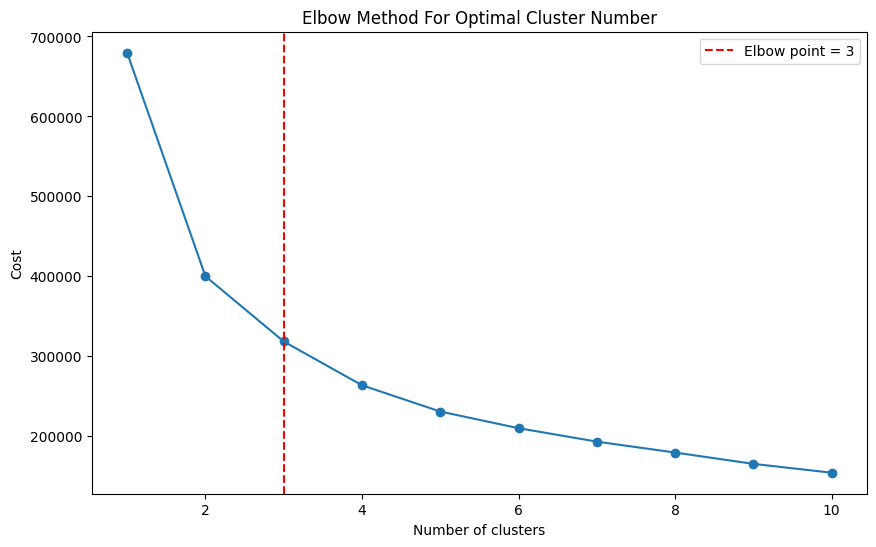

In [ ]:
from sklearn.cluster import KMeans
from estyp.cluster import NClusterSearch


searcher = NClusterSearch(estimator=KMeans(), method='elbow')
searcher.fit(X_scaled)

labels = searcher.labels_
predicted_labels = searcher.predict(X_scaled)
optimal_model = searcher.best_estimator_
optimal_clusters = searcher.optimal_clusters_

searcher.plot()


In [ ]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(X_scaled)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

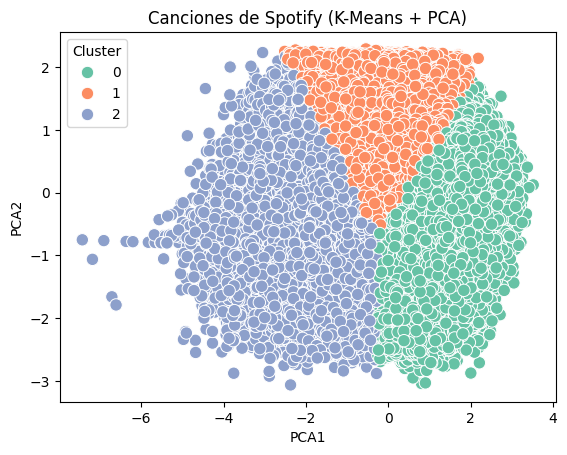

In [ ]:
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)
df["PCA1"], df["PCA2"] = components[:, 0], components[:, 1]

sns.scatterplot(data=df, x="PCA1", y="PCA2", hue="Cluster", palette="Set2", s=80)
plt.title("Canciones de Spotify (K-Means + PCA)")
plt.show()


In [ ]:
url = "https://raw.githubusercontent.com/gabminamedez/spotify-data/master/data.csv"
df_original = pd.read_csv(url)

df_original

,id,name,artists,duration_ms,release_date,year,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,mode,key,popularity,explicit
0,6KbQ3uYMLKb5jDxLF7wYDD,Singende Bataillone 1. Teil,['Carl Woitschach'],158648,1928,1928,0.9950,0.708,0.1950,0.563000,0.1510,-12.428,0.0506,118.469,0.7790,1,10,0,0
1,6KuQTIu1KoTTkLXKrwlLPV,"Fantasiestücke, Op. 111: Più tosto lento","['Robert Schumann', 'Vladimir Horowitz']",282133,1928,1928,0.9940,0.379,0.0135,0.901000,0.0763,-28.454,0.0462,83.972,0.0767,1,8,0,0
2,6L63VW0PibdM1HDSBoqnoM,Chapter 1.18 - Zamek kaniowski,['Seweryn Goszczyński'],104300,1928,1928,0.6040,0.749,0.2200,0.000000,0.1190,-19.924,0.9290,107.177,0.8800,0,5,0,0
3,6M94FkXd15sOAOQYRnWPN8,Bebamos Juntos - Instrumental (Remasterizado),['Francisco Canaro'],180760,9/25/28,1928,0.9950,0.781,0.1300,0.887000,0.1110,-14.734,0.0926,108.003,0.7200,0,1,0,0
4,6N6tiFZ9vLTSOIxkj8qKrd,"Polonaise-Fantaisie in A-Flat Major, Op. 61","['Frédéric Chopin', 'Vladimir Horowitz']",687733,1928,1928,0.9900,0.210,0.2040,0.908000,0.0980,-16.829,0.0424,62.149,0.0693,1,11,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169904,4KppkflX7I3vJQk7urOJaS,Skechers (feat. Tyga) - Remix,"['DripReport', 'Tyga']",163800,5/15/20,2020,0.1730,0.875,0.4430,0.000032,0.0891,-7.461,0.1430,100.012,0.3060,1,1,75,1
169905,1ehhGlTvjtHo2e4xJFB0SZ,Sweeter (feat. Terrace Martin),"['Leon Bridges', 'Terrace Martin']",167468,6/8/20,2020,0.0167,0.719,0.3850,0.031300,0.1110,-10.907,0.0403,128.000,0.2700,1,8,64,0
169906,52eycxprLhK3lPcRLbQiVk,How Would I Know,"['Kygo', 'Oh Wonder']",180700,5/29/20,2020,0.5380,0.514,0.5390,0.002330,0.1080,-9.332,0.1050,123.700,0.1530,1,7,70,0
169907,3wYOGJYD31sLRmBgCvWxa4,I Found You,"['Cash Cash', 'Andy Grammer']",167308,2/28/20,2020,0.0714,0.646,0.7610,0.000000,0.2220,-2.557,0.0385,129.916,0.4720,1,1,70,0


In [ ]:
df_original['Cluster'] = df['Cluster']
df_original.head()

,id,name,artists,duration_ms,release_date,year,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,mode,key,popularity,explicit,Cluster
0,6KbQ3uYMLKb5jDxLF7wYDD,Singende Bataillone 1. Teil,['Carl Woitschach'],158648,1928,1928,0.995,0.708,0.1950,0.563,0.1510,-12.428,0.0506,118.469,0.7790,1,10,0,0,1
1,6KuQTIu1KoTTkLXKrwlLPV,"Fantasiestücke, Op. 111: Più tosto lento","['Robert Schumann', 'Vladimir Horowitz']",282133,1928,1928,0.994,0.379,0.0135,0.901,0.0763,-28.454,0.0462,83.972,0.0767,1,8,0,0,2
2,6L63VW0PibdM1HDSBoqnoM,Chapter 1.18 - Zamek kaniowski,['Seweryn Goszczyński'],104300,1928,1928,0.604,0.749,0.2200,0.000,0.1190,-19.924,0.9290,107.177,0.8800,0,5,0,0,1
3,6M94FkXd15sOAOQYRnWPN8,Bebamos Juntos - Instrumental (Remasterizado),['Francisco Canaro'],180760,9/25/28,1928,0.995,0.781,0.1300,0.887,0.1110,-14.734,0.0926,108.003,0.7200,0,1,0,0,1
4,6N6tiFZ9vLTSOIxkj8qKrd,"Polonaise-Fantaisie in A-Flat Major, Op. 61","['Frédéric Chopin', 'Vladimir Horowitz']",687733,1928,1928,0.990,0.210,0.2040,0.908,0.0980,-16.829,0.0424,62.149,0.0693,1,11,1,0,2


In [ ]:
cluster_1_songs = df_original[df_original['Cluster'] == 1]
cluster_1_songs_sorted = cluster_1_songs.sort_values(by='popularity', ascending=False)
display(cluster_1_songs_sorted.head())

,id,name,artists,duration_ms,release_date,year,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,mode,key,popularity,explicit,Cluster
83756,2yBVeksU2EtrPJbTu4ZslK,What a Fool Believes,['The Doobie Brothers'],223867,1978,1978,0.284,0.758,0.378,0.000000,0.0490,-15.308,0.0449,120.736,0.985,0,8,70,0,1
82341,65jrjEhWfAvysKfnojk1i0,Under the Boardwalk,['The Drifters'],161960,6/1/64,1964,0.908,0.747,0.226,0.000168,0.1070,-13.635,0.0415,123.789,0.778,1,7,69,0,1
85359,5k3U0OGYBccHdKJJu3HrUN,"Hakuna Matata - From ""The Lion King""/Soundtrack","['Nathan Lane', 'Ernie Sabella', 'Jason Weaver...",213600,1/1/94,1994,0.617,0.408,0.313,0.000012,0.1150,-18.090,0.1370,170.013,0.725,1,0,69,0,1
83665,19Shlms2uTnOjIUg50TXzd,Never Going Back Again - 2004 Remaster,['Fleetwood Mac'],134400,2/4/77,1977,0.858,0.654,0.336,0.385000,0.0786,-12.825,0.0379,176.083,0.947,1,6,68,0,1
152497,49gXK8uoqUEHgzzHdkELMh,Loosing Interest,['Timmies'],117917,9/21/17,2017,0.510,0.927,0.198,0.118000,0.2240,-13.635,0.0922,113.952,0.764,0,10,68,0,1


In [ ]:
display(cluster_1_songs_sorted.head(20))

,id,name,artists,duration_ms,release_date,year,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,mode,key,popularity,explicit,Cluster
83756,2yBVeksU2EtrPJbTu4ZslK,What a Fool Believes,['The Doobie Brothers'],223867,1978,1978,0.284,0.758,0.3780,0.000000,0.0490,-15.308,0.0449,120.736,0.985,0,8,70,0,1
82341,65jrjEhWfAvysKfnojk1i0,Under the Boardwalk,['The Drifters'],161960,6/1/64,1964,0.908,0.747,0.2260,0.000168,0.1070,-13.635,0.0415,123.789,0.778,1,7,69,0,1
85359,5k3U0OGYBccHdKJJu3HrUN,"Hakuna Matata - From ""The Lion King""/Soundtrack","['Nathan Lane', 'Ernie Sabella', 'Jason Weaver...",213600,1/1/94,1994,0.617,0.408,0.3130,0.000012,0.1150,-18.090,0.1370,170.013,0.725,1,0,69,0,1
83665,19Shlms2uTnOjIUg50TXzd,Never Going Back Again - 2004 Remaster,['Fleetwood Mac'],134400,2/4/77,1977,0.858,0.654,0.3360,0.385000,0.0786,-12.825,0.0379,176.083,0.947,1,6,68,0,1
152497,49gXK8uoqUEHgzzHdkELMh,Loosing Interest,['Timmies'],117917,9/21/17,2017,0.510,0.927,0.1980,0.118000,0.2240,-13.635,0.0922,113.952,0.764,0,10,68,0,1
84648,7lJbTVbDEMa3w7NFamrwdq,Fishin' in the Dark,['Nitty Gritty Dirt Band'],202787,4/1/87,1987,0.198,0.771,0.2830,0.000000,0.0888,-16.326,0.0444,77.756,0.906,1,2,68,0,1
161222,1VLCctJbr8AjrZQ0KoyJ4A,Imagination,"['Shiloh Dynasty', 'Patient Zero']",104777,6/2/18,2018,0.715,0.816,0.0965,0.785000,0.1080,-22.035,0.0379,110.008,0.847,1,7,67,0,1
83788,39CyGKIFqMzSuynOR8uilD,Baltimore,['Nina Simone'],278867,1978,1978,0.417,0.638,0.2800,0.439000,0.0611,-16.516,0.0673,154.955,0.734,1,9,67,0,1
84003,60mGckXEG1EzR4VmjYLfEW,Guilty (feat. Barry Gibb),"['Barbra Streisand', 'Barry Gibb']",264333,9/23/80,1980,0.231,0.626,0.4250,0.000000,0.1140,-15.656,0.0356,150.875,0.952,1,0,67,0,1
82554,6PgVDY8GTkxF3GmhVGPzoB,"Hold On, I'm Comin'",['Sam & Dave'],155707,1966,1966,0.196,0.803,0.3380,0.038000,0.0970,-14.029,0.0349,106.841,0.912,1,6,66,0,1


In [ ]:
cluster_2_songs = df_original[df_original['Cluster'] == 2]
cluster_2_songs_sorted = cluster_2_songs.sort_values(by='popularity', ascending=False)
display(cluster_2_songs_sorted.head())

,id,name,artists,duration_ms,release_date,year,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,mode,key,popularity,explicit,Cluster
87870,43zdsphuZLzwA9k4DJhU0I,when the party's over,['Billie Eilish'],196077,3/29/19,2019,0.978,0.367,0.11100,0.00004,0.0897,-14.084,0.0972,82.642,0.1980,1,4,87,0,2
87653,2bRKxuH1o7pTmb1y4GfdEc,Clean White Noise - Loopable with no fade,"['Erik Eriksson', 'White Noise Baby Sleep', 'W...",90228,1/8/17,2017,0.791,0.000,0.00342,1.00000,0.1110,-28.460,0.0000,0.000,0.0000,1,8,86,0,2
87772,4ZLzoOkj0MPWrTLvooIuaa,Get You The Moon (feat. Snøw),"['Kina', 'Snøw']",179080,10/8/18,2018,0.720,0.498,0.23500,0.00000,0.1440,-16.541,0.1880,118.917,0.0895,0,1,85,0,2
97549,58wyJLv6yH1La9NIZPl3ne,Can We Kiss Forever?,"['Kina', 'Adriana Proenza']",187932,8/31/18,2018,0.894,0.522,0.12800,0.02600,0.0941,-18.717,0.0357,109.986,0.1240,1,4,84,0,2
97788,73SpzrcaHk0RQPFP73vqVR,No Time To Die,['Billie Eilish'],242265,2/13/20,2020,0.917,0.380,0.21900,0.01040,0.0827,-13.273,0.0358,73.537,0.0517,0,4,84,0,2


In [ ]:
display(cluster_2_songs_sorted.head(20))

,id,name,artists,duration_ms,release_date,year,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,mode,key,popularity,explicit,Cluster
87870,43zdsphuZLzwA9k4DJhU0I,when the party's over,['Billie Eilish'],196077,3/29/19,2019,0.9780,0.367,0.11100,0.000040,0.0897,-14.084,0.0972,82.642,0.1980,1,4,87,0,2
87653,2bRKxuH1o7pTmb1y4GfdEc,Clean White Noise - Loopable with no fade,"['Erik Eriksson', 'White Noise Baby Sleep', 'W...",90228,1/8/17,2017,0.7910,0.000,0.00342,1.000000,0.1110,-28.460,0.0000,0.000,0.0000,1,8,86,0,2
87772,4ZLzoOkj0MPWrTLvooIuaa,Get You The Moon (feat. Snøw),"['Kina', 'Snøw']",179080,10/8/18,2018,0.7200,0.498,0.23500,0.000000,0.1440,-16.541,0.1880,118.917,0.0895,0,1,85,0,2
97549,58wyJLv6yH1La9NIZPl3ne,Can We Kiss Forever?,"['Kina', 'Adriana Proenza']",187932,8/31/18,2018,0.8940,0.522,0.12800,0.026000,0.0941,-18.717,0.0357,109.986,0.1240,1,4,84,0,2
97788,73SpzrcaHk0RQPFP73vqVR,No Time To Die,['Billie Eilish'],242265,2/13/20,2020,0.9170,0.380,0.21900,0.010400,0.0827,-13.273,0.0358,73.537,0.0517,0,4,84,0,2
87906,6CcJMwBtXByIz4zQLzFkKc,i love you,['Billie Eilish'],291796,3/29/19,2019,0.9520,0.421,0.13100,0.004530,0.1090,-18.435,0.0382,137.446,0.1200,1,0,83,0,2
87651,65rkHetZXO6DQmBh3C2YtW,White Noise - 500 hz,['Granular'],147097,10/13/17,2017,0.9230,0.000,0.00005,0.297000,0.1100,-32.354,0.0000,0.000,0.0000,0,10,81,0,2
87652,6H4B9gJD6eQlNoEh8q85pP,White Noise - 145 hz,['Granular'],135484,10/13/17,2017,0.9440,0.000,0.00002,0.869000,0.1120,-40.449,0.0000,0.000,0.0000,0,2,80,0,2
97713,0tMSssfxAL2oV8Vri0mFHE,listen before i go,['Billie Eilish'],242652,3/29/19,2019,0.9350,0.319,0.05610,0.003840,0.3880,-23.023,0.0450,79.764,0.0820,1,0,79,0,2
107147,4QIo4oxwzzafcBWkKjDpXY,xanny,['Billie Eilish'],243725,3/29/19,2019,0.7510,0.521,0.12500,0.002070,0.2650,-17.832,0.2390,111.554,0.0528,1,9,79,0,2


In [ ]:
display(cluster_2_songs_sorted.tail(20))

,id,name,artists,duration_ms,release_date,year,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,mode,key,popularity,explicit,Cluster
199,4KzEt55q1rOlGDiISqYART,Schochney botey chomer,['D.roitman'],255040,1930,1930,0.994,0.270,0.1460,0.000117,0.1210,-16.569,0.0647,74.370,0.2550,1,3,0,0,2
200,4gZXSffISQgwcUg3FfU6Be,"Das ist bei uns nicht möglich, Kapitel 137","['Sinclair Lewis', 'Frank Arnold']",320145,1935,1935,0.747,0.632,0.1970,0.000000,0.1860,-16.435,0.9620,165.754,0.3700,0,4,0,0,2
202,4h8gqHQ6pdgXWqElxBSGeo,"Das ist bei uns nicht möglich, Kapitel 5","['Sinclair Lewis', 'Frank Arnold']",273072,1935,1935,0.565,0.722,0.2520,0.000000,0.1690,-14.629,0.9380,126.048,0.4560,0,5,0,0,2
150,47PSm96pHcTUuV1fLBtZ0q,Siete Lágrimas - Remasterizado,['Ignacio Corsini'],138347,6/21/30,1930,0.977,0.660,0.2150,0.000006,0.7820,-17.501,0.0938,107.809,0.5610,1,5,0,0,2
204,4hmVv3I9OPCbI5FbRa5lUI,Часть 58.3 & Часть 59.1 - Зеленые холмы Африки,['Эрнест Хемингуэй'],109512,1935,1935,0.492,0.626,0.2250,0.000000,0.1640,-16.619,0.9490,174.223,0.5340,1,7,0,1,2
206,4i89yRwIF9fyhCa0xhsx1q,"Haydn: String Quartet No. 62 in C Major, Op. 7...","['Franz Joseph Haydn', 'Pro Arte Quartet']",268947,1935,1935,0.952,0.383,0.0859,0.007590,0.0963,-17.174,0.0402,87.764,0.3990,0,0,0,0,2
207,4iCz3Nr7IryTuxf2PNhcXd,Los Promeseritos,"['Margarita Cueto', 'Jorge Añez']",210991,1/1/35,1935,0.991,0.751,0.1340,0.007370,0.1300,-13.177,0.4460,81.293,0.4590,1,5,0,0,2
210,4jJ1Xp7ccRdH2U3TcylvFI,"Das ist bei uns nicht möglich, Kapitel 193","['Sinclair Lewis', 'Frank Arnold']",326832,1935,1935,0.712,0.670,0.1500,0.000001,0.1230,-19.516,0.9580,147.377,0.4740,0,5,0,0,2
211,4k50qy50MOtBgkOBOjyfx8,"Haydn: String Quartet No. 59 in G Minor, Op. 7...","['Franz Joseph Haydn', 'Pro Arte Quartet']",192667,1935,1935,0.973,0.546,0.0580,0.625000,0.2880,-16.558,0.0476,149.401,0.6900,1,7,0,0,2
212,4k8gfZc9CfCiUQ7OQ9Q4bZ,"Leoncavallo: Pagliacci, Act 1: Intermezzo","['Ruggero Leoncavallo', 'Karl Böhm', 'Staatska...",213800,1935,1935,0.909,0.211,0.1780,0.917000,0.0861,-16.841,0.0415,74.311,0.0359,1,4,0,0,2


In [ ]:
cluster_3_songs = df_original[df_original['Cluster'] == 0]
cluster_3_songs_sorted = cluster_3_songs.sort_values(by='popularity', ascending=False)
display(cluster_3_songs_sorted.head())

,id,name,artists,duration_ms,release_date,year,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,mode,key,popularity,explicit,Cluster
87942,0VjIjW4GlUZAMYd2vXMi3b,Blinding Lights,['The Weeknd'],200040,3/20/20,2020,0.00146,0.514,0.730,0.000095,0.0897,-5.934,0.0598,171.005,0.334,1,1,100,0,0
87940,7ytR5pFWmSjzHJIeQkgog4,ROCKSTAR (feat. Roddy Ricch),"['DaBaby', 'Roddy Ricch']",181733,4/17/20,2020,0.24700,0.746,0.690,0.000000,0.1010,-7.956,0.1640,89.977,0.497,1,11,99,1,0
87949,7eJMfftS33KTjuF7lTsMCx,death bed (coffee for your head) (feat. beabad...,"['Powfu', 'beabadoobee']",173333,2/8/20,2020,0.73100,0.726,0.431,0.000000,0.6960,-8.765,0.1350,144.026,0.348,0,8,97,0,0
87941,39Yp9wwQiSRIDOvrVg7mbk,THE SCOTTS,"['THE SCOTTS', 'Travis Scott', 'Kid Cudi']",165978,4/24/20,2020,0.23300,0.716,0.537,0.000000,0.1570,-7.648,0.0514,129.979,0.280,0,0,96,1,0
87844,4nK5YrxbMGZstTLbvj6Gxw,Supalonely,"['BENEE', 'Gus Dapperton']",223480,11/15/19,2019,0.30500,0.863,0.631,0.000030,0.1230,-4.689,0.0534,128.977,0.817,1,7,95,1,0


# Pruebas de solución

In [ ]:
import pandas as pd

# Cargar el dataset original
url = "https://raw.githubusercontent.com/gabminamedez/spotify-data/master/data.csv"
df_original = pd.read_csv(url)

# Añadir la columna de clusters (asegúrate de que df['Cluster'] ya está calculado)
df_original['Cluster'] = df['Cluster']

# Calcular las medias por cluster para las variables usadas en el clustering
cluster_stats = df_original.groupby("Cluster")[["energy", "popularity", "valence", "loudness"]].mean()
print("Características promedio por cluster:")
print(cluster_stats)

# Contar el número de canciones por cluster
cluster_counts = df_original.groupby("Cluster")["id"].count()
print("\nNúmero de canciones por cluster:")
print(cluster_counts)

Características promedio por cluster:
           energy  popularity   valence   loudness
Cluster                                           
0        0.710774   49.030624  0.544809  -7.100193
1        0.452119   18.984639  0.740863 -11.590876
2        0.191677   18.432667  0.292854 -17.583090

Número de canciones por cluster:
Cluster
0    71970
1    50258
2    47681
Name: id, dtype: int64


In [ ]:
%%capture
!pip install --upgrade mistralai

In [ ]:
import os
from dotenv import load_dotenv
from mistralai import Mistral  # Nueva importación

# Cargar variables del archivo .env
load_dotenv()

# Cargar la clave de la API desde variable de entorno (nunca se imprime)
api_key = os.getenv("MISTRAL_API_KEY")
if not api_key:
    raise ValueError("Error: La variable de entorno MISTRAL_API_KEY no está configurada.")

# Inicializar el cliente con la nueva clase Mistral
client = Mistral(api_key=api_key)

# Ejemplo: Generar texto con un modelo
response = client.chat.complete(
    model="open-mistral-7b",  # Cambia por el modelo que desees, ej: 'mistral-large-latest'
    messages=[
        {
            "role": "user",
            "content": "Explica qué es la inteligencia artificial en 3 oraciones."
        }
    ]
)

# Imprimir solo la respuesta
print(response.choices[0].message.content)

In [ ]:
df_original

,id,name,artists,duration_ms,release_date,year,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,mode,key,popularity,explicit,Cluster
0,6KbQ3uYMLKb5jDxLF7wYDD,Singende Bataillone 1. Teil,['Carl Woitschach'],158648,1928,1928,0.9950,0.708,0.1950,0.563000,0.1510,-12.428,0.0506,118.469,0.7790,1,10,0,0,1
1,6KuQTIu1KoTTkLXKrwlLPV,"Fantasiestücke, Op. 111: Più tosto lento","['Robert Schumann', 'Vladimir Horowitz']",282133,1928,1928,0.9940,0.379,0.0135,0.901000,0.0763,-28.454,0.0462,83.972,0.0767,1,8,0,0,2
2,6L63VW0PibdM1HDSBoqnoM,Chapter 1.18 - Zamek kaniowski,['Seweryn Goszczyński'],104300,1928,1928,0.6040,0.749,0.2200,0.000000,0.1190,-19.924,0.9290,107.177,0.8800,0,5,0,0,1
3,6M94FkXd15sOAOQYRnWPN8,Bebamos Juntos - Instrumental (Remasterizado),['Francisco Canaro'],180760,9/25/28,1928,0.9950,0.781,0.1300,0.887000,0.1110,-14.734,0.0926,108.003,0.7200,0,1,0,0,1
4,6N6tiFZ9vLTSOIxkj8qKrd,"Polonaise-Fantaisie in A-Flat Major, Op. 61","['Frédéric Chopin', 'Vladimir Horowitz']",687733,1928,1928,0.9900,0.210,0.2040,0.908000,0.0980,-16.829,0.0424,62.149,0.0693,1,11,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169904,4KppkflX7I3vJQk7urOJaS,Skechers (feat. Tyga) - Remix,"['DripReport', 'Tyga']",163800,5/15/20,2020,0.1730,0.875,0.4430,0.000032,0.0891,-7.461,0.1430,100.012,0.3060,1,1,75,1,0
169905,1ehhGlTvjtHo2e4xJFB0SZ,Sweeter (feat. Terrace Martin),"['Leon Bridges', 'Terrace Martin']",167468,6/8/20,2020,0.0167,0.719,0.3850,0.031300,0.1110,-10.907,0.0403,128.000,0.2700,1,8,64,0,0
169906,52eycxprLhK3lPcRLbQiVk,How Would I Know,"['Kygo', 'Oh Wonder']",180700,5/29/20,2020,0.5380,0.514,0.5390,0.002330,0.1080,-9.332,0.1050,123.700,0.1530,1,7,70,0,0
169907,3wYOGJYD31sLRmBgCvWxa4,I Found You,"['Cash Cash', 'Andy Grammer']",167308,2/28/20,2020,0.0714,0.646,0.7610,0.000000,0.2220,-2.557,0.0385,129.916,0.4720,1,1,70,0,0


# K Prototypes

In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/gabminamedez/spotify-data/master/data.csv"
df = pd.read_csv(url)

df.head()

,id,name,artists,duration_ms,release_date,year,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,mode,key,popularity,explicit
0,6KbQ3uYMLKb5jDxLF7wYDD,Singende Bataillone 1. Teil,['Carl Woitschach'],158648,1928,1928,0.995,0.708,0.1950,0.563,0.1510,-12.428,0.0506,118.469,0.7790,1,10,0,0
1,6KuQTIu1KoTTkLXKrwlLPV,"Fantasiestücke, Op. 111: Più tosto lento","['Robert Schumann', 'Vladimir Horowitz']",282133,1928,1928,0.994,0.379,0.0135,0.901,0.0763,-28.454,0.0462,83.972,0.0767,1,8,0,0
2,6L63VW0PibdM1HDSBoqnoM,Chapter 1.18 - Zamek kaniowski,['Seweryn Goszczyński'],104300,1928,1928,0.604,0.749,0.2200,0.000,0.1190,-19.924,0.9290,107.177,0.8800,0,5,0,0
3,6M94FkXd15sOAOQYRnWPN8,Bebamos Juntos - Instrumental (Remasterizado),['Francisco Canaro'],180760,9/25/28,1928,0.995,0.781,0.1300,0.887,0.1110,-14.734,0.0926,108.003,0.7200,0,1,0,0
4,6N6tiFZ9vLTSOIxkj8qKrd,"Polonaise-Fantaisie in A-Flat Major, Op. 61","['Frédéric Chopin', 'Vladimir Horowitz']",687733,1928,1928,0.990,0.210,0.2040,0.908,0.0980,-16.829,0.0424,62.149,0.0693,1,11,1,0


In [ ]:
%%capture
!pip install kmodes pandas numpy

In [ ]:
import pandas as pd
import numpy as np
from kmodes.kprototypes import KPrototypes

In [ ]:
cols = [
    'artists', 'acousticness', 'danceability', 'energy',
    'instrumentalness', 'liveness', 'loudness', 'speechiness',
    'tempo', 'valence', 'mode', 'key', 'popularity', 'explicit'
]

data = df[cols].copy()

In [ ]:
# Asegurar tipos
data['artists'] = data['artists'].astype(str)
data['mode'] = data['mode'].astype(str)
data['explicit'] = data['explicit'].astype(str)
data['key'] = data['key'].astype(str)

# Rellenar nulos
data = data.fillna(data.median(numeric_only=True))


In [ ]:
categorical_columns = ['artists', 'mode', 'key', 'explicit']
categorical_index = [data.columns.get_loc(col) for col in categorical_columns]
categorical_index


[0, 10, 11, 13]

In [ ]:
# https://pypi.org/project/kmodes/

In [ ]:
kproto = KPrototypes(n_clusters=5, init='Huang', n_init=5, verbose=1)
clusters = kproto.fit_predict(data, categorical=categorical_index)


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 33530, ncost: 67796249.9177683
Run: 1, iteration: 2/100, moves: 12455, ncost: 65107539.93941685
Run: 1, iteration: 3/100, moves: 10229, ncost: 63205220.76689067
Run: 1, iteration: 4/100, moves: 8847, ncost: 61764592.808100045
Run: 1, iteration: 5/100, moves: 7769, ncost: 60715565.486188136
Run: 1, iteration: 6/100, moves: 8139, ncost: 59626027.626582265
Run: 1, iteration: 7/100, moves: 7656, ncost: 58948798.134731464
Run: 1, iteration: 8/100, moves: 5169, ncost: 58732116.69342938
Run: 1, iteration: 9/100, moves: 2762, ncost: 58680099.626140416
Run: 1, iteration: 10/100, moves: 1323, ncost: 58667811.74425774
Run: 1, iteration: 11/100, moves: 675, ncost: 58664544.69886512
Run: 1, iteration: 12/100, moves: 314, ncost: 58663768.492127754
Run: 1, iteration: 13/100, moves: 142, ncost: 58663582.66645353
Run: 1, iteration: 14/100, moves: 84, ncost: 58663511.73663148
Run: 1, iteratio

In [ ]:
data['cluster'] = clusters
data.head()


,artists,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,mode,key,popularity,explicit,cluster
0,['Carl Woitschach'],0.995,0.708,0.1950,0.563,0.1510,-12.428,0.0506,118.469,0.7790,1,10,0,0,1
1,"['Robert Schumann', 'Vladimir Horowitz']",0.994,0.379,0.0135,0.901,0.0763,-28.454,0.0462,83.972,0.0767,1,8,0,0,0
2,['Seweryn Goszczyński'],0.604,0.749,0.2200,0.000,0.1190,-19.924,0.9290,107.177,0.8800,0,5,0,0,1
3,['Francisco Canaro'],0.995,0.781,0.1300,0.887,0.1110,-14.734,0.0926,108.003,0.7200,0,1,0,0,1
4,"['Frédéric Chopin', 'Vladimir Horowitz']",0.990,0.210,0.2040,0.908,0.0980,-16.829,0.0424,62.149,0.0693,1,11,1,0,0


In [ ]:
data['cluster'].value_counts()


,count
cluster,
4,42870
2,39880
1,35413
0,29387
3,22359


In [ ]:
cluster_summary = data.groupby('cluster').agg({
    'acousticness': 'mean',
    'danceability': 'mean',
    'energy': 'mean',
    'valence': 'mean',
    'popularity': 'mean'
})
cluster_summary


,acousticness,danceability,energy,valence,popularity
cluster,,,,,
0,0.816204,0.451534,0.267024,0.434214,7.989723
1,0.685762,0.556836,0.389135,0.582826,11.995171
2,0.279244,0.593089,0.621788,0.547431,48.947869
3,0.399536,0.456559,0.573367,0.576843,34.118789
4,0.360657,0.573534,0.554515,0.519681,46.355727


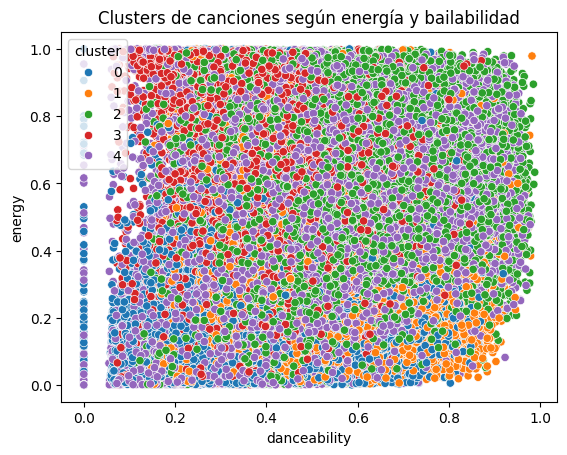

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(
    data=data,
    x='danceability',
    y='energy',
    hue='cluster',
    palette='tab10'
)
plt.title('Clusters de canciones según energía y bailabilidad')
plt.show()


In [ ]:
# Instalar versión clásica si es necesario
!pip install openai --upgrade

import openai
import os
from getpass import getpass

# Establecer la clave como variable de entorno
os.environ["OPENAI_API_KEY"] = getpass("Introduce tu clave secreta de OpenAI: ")

# Asignar api_key directamente
openai.api_key = os.environ["OPENAI_API_KEY"]



Introduce tu clave secreta de OpenAI: ··········


In [ ]:
# Create empty list to store top 50 songs from each cluster
top_50_per_cluster = []

# Iterate through each cluster (0, 1, and 2)
for cluster_num in [0, 1, 2]:
    # Filter the original dataframe for the current cluster
    cluster_songs = df_original[df_original['Cluster'] == cluster_num]

    # Sort the cluster songs by popularity in descending order
    cluster_songs_sorted = cluster_songs.sort_values(by='popularity', ascending=False)

    # Select the top 50 songs from the sorted cluster
    top_50_songs = cluster_songs_sorted.head(50)

    # Append the top 50 songs to the list
    top_50_per_cluster.append(top_50_songs)

# Concatenate the lists of top 50 songs from each cluster into a new dataframe
df_original_top50_per_cluster = pd.concat(top_50_per_cluster)

# Display the head of the new dataframe to verify
display(df_original_top50_per_cluster.head())

,id,name,artists,duration_ms,release_date,year,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,mode,key,popularity,explicit,Cluster
87942,0VjIjW4GlUZAMYd2vXMi3b,Blinding Lights,['The Weeknd'],200040,3/20/20,2020,0.00146,0.514,0.730,0.000095,0.0897,-5.934,0.0598,171.005,0.334,1,1,100,0,0
87940,7ytR5pFWmSjzHJIeQkgog4,ROCKSTAR (feat. Roddy Ricch),"['DaBaby', 'Roddy Ricch']",181733,4/17/20,2020,0.24700,0.746,0.690,0.000000,0.1010,-7.956,0.1640,89.977,0.497,1,11,99,1,0
87949,7eJMfftS33KTjuF7lTsMCx,death bed (coffee for your head) (feat. beabad...,"['Powfu', 'beabadoobee']",173333,2/8/20,2020,0.73100,0.726,0.431,0.000000,0.6960,-8.765,0.1350,144.026,0.348,0,8,97,0,0
87941,39Yp9wwQiSRIDOvrVg7mbk,THE SCOTTS,"['THE SCOTTS', 'Travis Scott', 'Kid Cudi']",165978,4/24/20,2020,0.23300,0.716,0.537,0.000000,0.1570,-7.648,0.0514,129.979,0.280,0,0,96,1,0
87844,4nK5YrxbMGZstTLbvj6Gxw,Supalonely,"['BENEE', 'Gus Dapperton']",223480,11/15/19,2019,0.30500,0.863,0.631,0.000030,0.1230,-4.689,0.0534,128.977,0.817,1,7,95,1,0


In [ ]:
c_kmeans_cero = df_original_top50_per_cluster[df_original_top50_per_cluster['Cluster'] == 0]
c_kmeans_cero_string = c_kmeans_cero.to_string()
c_kmeans_uno = df_original_top50_per_cluster[df_original_top50_per_cluster['Cluster'] == 1]
c_kmeans_uno_string= c_kmeans_uno.to_string()
c_kmeans_dos = df_original_top50_per_cluster[df_original_top50_per_cluster['Cluster'] == 2]
c_kmeans_dos_strimng = c_kmeans_dos.to_string()



In [ ]:
# Create empty list to store top 50 songs from each cluster
top_50_per_cluster_data = []

# Iterate through each cluster (0, 1, 2, 3, and 4, based on the KPrototypes output)
for cluster_num in [0, 1, 2, 3, 4]:
    # Filter the data dataframe for the current cluster
    cluster_songs_data = data[data['cluster'] == cluster_num]

    # Sort the cluster songs by popularity in descending order
    cluster_songs_sorted_data = cluster_songs_data.sort_values(by='popularity', ascending=False)

    # Select the top 50 songs from the sorted cluster
    top_50_songs_data = cluster_songs_sorted_data.head(50)

    # Append the top 50 songs to the list
    top_50_per_cluster_data.append(top_50_songs_data)

# Concatenate the lists of top 50 songs from each cluster into a new dataframe
data_top50_per_cluster = pd.concat(top_50_per_cluster_data)

# Display the head of the new dataframe to verify
display(data_top50_per_cluster.head())

,artists,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,mode,key,popularity,explicit,cluster
7411,['Sound Dreamer'],0.111,0.0,0.000099,0.392,0.137,-21.669,0.0,0.0,0.0,1,2,50,0,0
31147,['Baby Sweet Dream'],0.690,0.0,0.000020,0.420,0.863,-33.764,0.0,0.0,0.0,0,6,49,0,0
62254,['Baby Sweet Dream'],0.690,0.0,0.000020,0.420,0.863,-33.764,0.0,0.0,0.0,0,6,49,0,0
47417,['White Noise Therapy'],0.000,0.0,0.000020,0.124,0.688,-17.502,0.0,0.0,0.0,0,10,48,0,0
6930,['Crain & Taylor'],0.931,0.0,0.000075,0.892,0.115,-19.703,0.0,0.0,0.0,0,1,47,0,0


In [ ]:
c_kproto_cero = data_top50_per_cluster[data_top50_per_cluster['cluster'] == 0]
c_kproto_cero_string = c_kproto_cero.to_string()
c_kproto_uno = data_top50_per_cluster[data_top50_per_cluster['cluster'] == 1]
c_kproto_uno_string = c_kproto_uno.to_string()
c_kproto_dos = data_top50_per_cluster[data_top50_per_cluster['cluster'] == 2]
c_kproto_dos_string = c_kproto_dos.to_string()
c_kproto_tres = data_top50_per_cluster[data_top50_per_cluster['cluster'] == 3]
c_kproto_tres_string = c_kproto_tres.to_string()
c_kproto_cuatro = data_top50_per_cluster[data_top50_per_cluster['cluster'] == 4]
c_kproto_cuatro_string = c_kproto_cuatro.to_string()

In [ ]:
from openai import OpenAI


In [ ]:
client = OpenAI(api_key=os.environ.get("OPENAI_API_KEY"))


In [ ]:
user_input = input("Escribe lo que quieres preguntar: ")

# Crea el prompt completo
prompt = f"{user_input}\n\nAquí están los datos del dataset con 3 clusters kmeans que son del cluster 0:\n{c_kmeans_cero_string}"

response = client.responses.create(
    model="gpt-4",  # asegúrate de que este sea el modelo correcto disponible para ti
    input=[
        {"role": "user", "content": prompt}
    ]
)

# Imprime la respuesta
print(response.output_text)

Escribe lo que quieres preguntar: cuales son las canciones más populares?
Las canciones más populares en este conjunto de datos incluyen "Blinding Lights" de The Weeknd, "ROCKSTAR (feat. Roddy Ricch)" de DaBaby, "death bed (coffee for your head) (feat. beabadoobee)" de Powfu, y "THE SCOTTS" de THE SCOTTS, Travis Scott y Kid Cudi.


In [ ]:
# Install required libraries if needed (run in your environment)
# pip install gradio openai pandas scikit-learn

import gradio as gr
import pandas as pd
from openai import OpenAI
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
import json

# Load the Spotify dataset
url = "https://raw.githubusercontent.com/gabminamedez/spotify-data/master/data.csv"
df_original = pd.read_csv(url)

# Select relevant features for clustering (as in the document)
df = df_original[["energy", "popularity", "valence", "loudness"]].dropna()

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Perform K-Means with 3 clusters (as determined in the document)
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(X_scaled)

# Add cluster back to original dataframe
df_original['Cluster'] = df['Cluster']

# Prepare top-50 songs per cluster sorted by popularity
top_50_per_cluster = []
for cluster_num in [0, 1, 2]:
    cluster_songs = df_original[df_original['Cluster'] == cluster_num]
    cluster_songs_sorted = cluster_songs.sort_values(by='popularity', ascending=False)
    top_50_songs = cluster_songs_sorted.head(50)
    top_50_per_cluster.append(top_50_songs)

# Function to get data for a cluster as JSON (better than to_string for structured parsing)
def get_cluster_data(cluster_num):
    cluster_df = top_50_per_cluster[cluster_num]
    # Convert to JSON (records orient for list of dicts)
    cluster_json = cluster_df.to_json(orient='records')
    return cluster_json

# Function to query OpenAI
def query_openai(api_key, cluster_num, question):
    client = OpenAI(api_key=api_key)

    cluster_data_json = get_cluster_data(int(cluster_num))

    # Prompt: Include the question and the JSON data
    prompt = f"""
    {question}

    Aquí están los datos del cluster {cluster_num} en formato JSON (una lista de objetos con detalles de canciones):
    {cluster_data_json}

    Analiza los datos como un DataFrame JSON y responde basado en ellos.
    """

    try:
        response = client.chat.completions.create(
            model="gpt-4o-mini",  # Use a suitable model; adjust if needed (e.g., gpt-3.5-turbo for cost)
            messages=[
                {"role": "system", "content": "Eres un analista de datos de música en Spotify. Responde preguntas basadas en los datos proporcionados."},
                {"role": "user", "content": prompt}
            ],
            max_tokens=500,  # Limit to manage context; adjust based on model
            temperature=0.7
        )
        return response.choices[0].message.content
    except Exception as e:
        return f"Error: {str(e)}"

# Gradio Interface
with gr.Blocks(title="Spotify Cluster Analyzer") as demo:
    gr.Markdown("# App para Analizar Clusters de Canciones en Spotify con OpenAI")

    with gr.Row():
        api_key = gr.Textbox(label="Clave API de OpenAI", type="password", placeholder="Ingresa tu API key aquí")

    with gr.Row():
        cluster_choice = gr.Dropdown(choices=["0", "1", "2"], label="Elige un Cluster")
        question = gr.Textbox(label="Haz una pregunta sobre el cluster", placeholder="Ej: ¿Cuáles son las canciones más populares?")

    submit_btn = gr.Button("Enviar Pregunta")

    output = gr.Textbox(label="Respuesta de OpenAI", lines=10)

    # On submit
    submit_btn.click(
        fn=query_openai,
        inputs=[api_key, cluster_choice, question],
        outputs=output
    )

    gr.Markdown("""
    ### Instrucciones:
    - Ingresa tu clave API de OpenAI.
    - Elige un cluster (0, 1 o 2, basados en K-Means con energy, popularity, valence, loudness).
    - Escribe una pregunta (ej: "Describe las características promedio" o "Lista las top 5 canciones por energy").
    - Los datos se envían como JSON para mejor manejo de contexto (en lugar de to_string).
    - Nota: El modelo tiene límite de tokens; si los datos son grandes, considera resumir o usar un modelo con más contexto como GPT-4.
    """)

# Launch the app
demo.launch()

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://2b616ab7e8e5cea15f.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
# Install required libraries if needed (run in your environment)
# pip install gradio openai pandas numpy kmodes scikit-learn

import gradio as gr
import pandas as pd
import numpy as np
from kmodes.kprototypes import KPrototypes
from openai import OpenAI
import json

# Load the Spotify dataset
url = "https://raw.githubusercontent.com/gabminamedez/spotify-data/master/data.csv"
df_original = pd.read_csv(url)

# Prepare data for K-Prototypes (as in the document)
cols = [
    'artists', 'acousticness', 'danceability', 'energy',
    'instrumentalness', 'liveness', 'loudness', 'speechiness',
    'tempo', 'valence', 'mode', 'key', 'popularity', 'explicit'
]
data = df_original[cols].copy()

# Ensure types
data['artists'] = data['artists'].astype(str)
data['mode'] = data['mode'].astype(str)
data['explicit'] = data['explicit'].astype(str)
data['key'] = data['key'].astype(str)

# Fill nulls for numerical columns
data = data.fillna(data.median(numeric_only=True))

# Get categorical indices
categorical_columns = ['artists', 'mode', 'key', 'explicit']
categorical_index = [data.columns.get_loc(col) for col in categorical_columns]

# Train K-Prototypes with 5 clusters (as in the document)
kproto = KPrototypes(n_clusters=5, init='Huang', n_init=5, verbose=0)  # Set verbose=0 to avoid output clutter
clusters = kproto.fit_predict(data, categorical=categorical_index)

# Add cluster back to original dataframe
df_original['cluster'] = clusters

# Prepare top-50 songs per cluster sorted by popularity
top_50_per_cluster = []
for cluster_num in [0, 1, 2, 3, 4]:
    cluster_songs = df_original[df_original['cluster'] == cluster_num]
    cluster_songs_sorted = cluster_songs.sort_values(by='popularity', ascending=False)
    top_50_songs = cluster_songs_sorted.head(50)
    top_50_per_cluster.append(top_50_songs)

# Function to get data for a cluster as JSON (better than to_string for structured parsing)
def get_cluster_data(cluster_num):
    cluster_df = top_50_per_cluster[cluster_num]
    # Convert to JSON (records orient for list of dicts)
    cluster_json = cluster_df.to_json(orient='records')
    return cluster_json

# Function to query OpenAI
def query_openai(api_key, cluster_num, question):
    client = OpenAI(api_key=api_key)

    cluster_data_json = get_cluster_data(int(cluster_num))

    # Prompt: Include the question and the JSON data
    prompt = f"""
    {question}

    Aquí están los datos del cluster {cluster_num} en formato JSON (una lista de objetos con detalles de canciones):
    {cluster_data_json}

    Analiza los datos como un DataFrame JSON y responde basado en ellos.
    """

    try:
        response = client.chat.completions.create(
            model="gpt-4o-mini",  # Use a suitable model; adjust if needed (e.g., gpt-3.5-turbo for cost)
            messages=[
                {"role": "system", "content": "Eres un analista de datos de música en Spotify. Responde preguntas basadas en los datos proporcionados."},
                {"role": "user", "content": prompt}
            ],
            max_tokens=500,  # Limit to manage context; adjust based on model
            temperature=0.7
        )
        return response.choices[0].message.content
    except Exception as e:
        return f"Error: {str(e)}"

# Gradio Interface
with gr.Blocks(title="Spotify K-Prototypes Cluster Analyzer") as demo:
    gr.Markdown("# App para Analizar Clusters de Canciones en Spotify con K-Prototypes y OpenAI")

    with gr.Row():
        api_key = gr.Textbox(label="Clave API de OpenAI", type="password", placeholder="Ingresa tu API key aquí")

    with gr.Row():
        cluster_choice = gr.Dropdown(choices=["0", "1", "2", "3", "4"], label="Elige un Cluster")
        question = gr.Textbox(label="Haz una pregunta sobre el cluster", placeholder="Ej: ¿Cuáles son las canciones más populares?")

    submit_btn = gr.Button("Enviar Pregunta")

    output = gr.Textbox(label="Respuesta de OpenAI", lines=10)

    # On submit
    submit_btn.click(
        fn=query_openai,
        inputs=[api_key, cluster_choice, question],
        outputs=output
    )

    gr.Markdown("""
    ### Instrucciones:
    - Ingresa tu clave API de OpenAI.
    - Elige un cluster (0 a 4, basados en K-Prototypes con variables mixtas: artists, acousticness, etc.).
    - Escribe una pregunta (ej: "Describe las características promedio" o "Lista las top 5 canciones por energy").
    - Los datos se envían como JSON para mejor manejo de contexto (en lugar de to_string).
    - Nota: El modelo tiene límite de tokens; si los datos son grandes, considera resumir o usar un modelo con más contexto como GPT-4.
    """)

# Launch the app
demo.launch()

In [ ]:
data

In [ ]:
data['cluster'] = clusters


In [ ]:
data

In [ ]:
# Install required libraries if needed (run in your environment)
# pip install gradio openai pandas numpy kmodes

import gradio as gr
import pandas as pd
import numpy as np
from kmodes.kprototypes import KPrototypes
from openai import OpenAI
import json

# Load the Spotify dataset
url = "https://raw.githubusercontent.com/gabminamedez/spotify-data/master/data.csv"
df_original = pd.read_csv(url)

# Prepare data for K-Prototypes (as in the original document)
cols = [
    'artists', 'acousticness', 'danceability', 'energy',
    'instrumentalness', 'liveness', 'loudness', 'speechiness',
    'tempo', 'valence', 'mode', 'key', 'popularity', 'explicit'
]
data = df_original[cols].copy()

# Ensure types
data['artists'] = data['artists'].astype(str)
data['mode'] = data['mode'].astype(str)
data['explicit'] = data['explicit'].astype(str)
data['key'] = data['key'].astype(str)

# Fill nulls for numerical columns
data = data.fillna(data.median(numeric_only=True))

# Get categorical indices
categorical_columns = ['artists', 'mode', 'key', 'explicit']
categorical_index = [data.columns.get_loc(col) for col in categorical_columns]

# Train K-Prototypes with 5 clusters (as in the document)
kproto = KPrototypes(n_clusters=5, init='Huang', n_init=5, verbose=0, random_state=42)
clusters = kproto.fit_predict(data, categorical=categorical_index)

# Add cluster back to original dataframe
df_original['cluster'] = clusters

# Prepare top-50 songs per cluster sorted by popularity
top_50_per_cluster = []
for cluster_num in [0, 1, 2, 3, 4]:
    cluster_songs = df_original[df_original['cluster'] == cluster_num]
    cluster_songs_sorted = cluster_songs.sort_values(by='popularity', ascending=False)
    top_50_songs = cluster_songs_sorted.head(50)
    top_50_per_cluster.append(top_50_songs)

# Define precomputed cluster data (as DataFrames, not strings)
c_kproto_cero = top_50_per_cluster[0]
c_kproto_uno = top_50_per_cluster[1]
c_kproto_dos = top_50_per_cluster[2]
c_kproto_tres = top_50_per_cluster[3]
c_kproto_cuatro = top_50_per_cluster[4]

# Dictionary to store cluster data for easy access
cluster_data = {
    '0': c_kproto_cero,
    '1': c_kproto_uno,
    '2': c_kproto_dos,
    '3': c_kproto_tres,
    '4': c_kproto_cuatro
}

# Function to get data for a cluster as JSON
def get_cluster_data(cluster_num):
    cluster_df = cluster_data[cluster_num]
    # Convert to JSON (records orient for list of dicts)
    cluster_json = cluster_df.to_json(orient='records')
    return cluster_json

# Function to query OpenAI
def query_openai(api_key, cluster_num, question):
    client = OpenAI(api_key=api_key)

    cluster_data_json = get_cluster_data(cluster_num)

    # Prompt: Include the question and the JSON data
    prompt = f"""
    {question}

    Aquí están los datos del cluster {cluster_num} en formato JSON (una lista de objetos con detalles de canciones):
    {cluster_data_json}

    Analiza los datos como un DataFrame JSON y responde basado en ellos.
    """

    try:
        response = client.chat.completions.create(
            model="gpt-4o-mini",  # Adjust model if needed (e.g., gpt-3.5-turbo for cost)
            messages=[
                {"role": "system", "content": "Eres un analista de datos de música en Spotify. Responde preguntas basadas en los datos proporcionados."},
                {"role": "user", "content": prompt}
            ],
            max_tokens=500,  # Limit to manage context; adjust based on model
            temperature=0.7
        )
        return response.choices[0].message.content
    except Exception as e:
        return f"Error: {str(e)}"

# Gradio Interface
with gr.Blocks(title="Spotify K-Prototypes Cluster Analyzer") as demo:
    gr.Markdown("# App para Analizar Clusters de Canciones en Spotify con K-Prototypes y OpenAI")

    with gr.Row():
        api_key = gr.Textbox(label="Clave API de OpenAI", type="password", placeholder="Ingresa tu API key aquí")

    with gr.Row():
        cluster_choice = gr.Dropdown(choices=["0", "1", "2", "3", "4"], label="Elige un Cluster")
        question = gr.Textbox(label="Haz una pregunta sobre el cluster", placeholder="Ej: ¿Cuáles son las canciones más populares?")

    submit_btn = gr.Button("Enviar Pregunta")

    output = gr.Textbox(label="Respuesta de OpenAI", lines=10)

    # On submit
    submit_btn.click(
        fn=query_openai,
        inputs=[api_key, cluster_choice, question],
        outputs=output
    )

    gr.Markdown("""
    ### Instrucciones:
    - Ingresa tu clave API de OpenAI.
    - Elige un cluster (0 a 4, basados en K-Prototypes con variables mixtas: artists, acousticness, etc.).
    - Escribe una pregunta (ej: "Describe las características promedio" o "Lista las top 5 canciones por energy").
    - Los datos se envían como JSON para mejor manejo de contexto (en lugar de to_string).
    - Nota: El modelo tiene límite de tokens; si los datos son grandes, considera resumir o usar un modelo con más contexto como GPT-4.
    """)

# Launch the app
demo.launch(debug=True)

In [ ]:
!pip install --extra-index-url=https://pypi.nvidia.com cuml-cu12==24.08.00
!pip install gradio openai pandas numpy kmodes cudf-cu12

In [ ]:
# Instala si no lo hiciste en las instrucciones
# !pip install --extra-index-url=https://pypi.nvidia.com cuml-cu12==24.08.00
# !pip install gradio openai pandas numpy kmodes cudf-cu12

import gradio as gr
import pandas as pd
import numpy as np
from openai import OpenAI
import json
import cuml
from cuml.cluster import KMeans as cuKMeans
import cudf  # Para DataFrames en GPU

# Carga el dataset de Spotify
url = "https://raw.githubusercontent.com/gabminamedez/spotify-data/master/data.csv"
df_original = pd.read_csv(url)

# Prepara data para clustering (variables mixtas, pero usaremos solo numéricas para GPU)
cols = [
    'artists', 'acousticness', 'danceability', 'energy',
    'instrumentalness', 'liveness', 'loudness', 'speechiness',
    'tempo', 'valence', 'mode', 'key', 'popularity', 'explicit'
]
data = df_original[cols].copy()

# Asegura tipos
data['artists'] = data['artists'].astype(str)
data['mode'] = data['mode'].astype(str)
data['explicit'] = data['explicit'].astype(str)
data['key'] = data['key'].astype(str)

# Rellena nulos en numéricas
data = data.fillna(data.median(numeric_only=True))

# Para aceleración GPU: Usa solo features numéricas (aproximación a K-Prototypes)
num_cols = ['acousticness', 'danceability', 'energy', 'instrumentalness',
            'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity']
data_num = data[num_cols]

# Convierte a cuDF (GPU DataFrame)
gdf = cudf.from_pandas(data_num)

# Clustering K-Means en GPU con 5 clusters (rápido, <10 seg)
cu_kmeans = cuKMeans(n_clusters=5, random_state=42)
clusters = cu_kmeans.fit_predict(gdf).to_numpy()  # Vuelve a NumPy

# Agrega clusters al DataFrame original
df_original['cluster'] = clusters

# Prepara top-50 canciones por cluster ordenadas por popularity
top_50_per_cluster = []
for cluster_num in [0, 1, 2, 3, 4]:
    cluster_songs = df_original[df_original['cluster'] == cluster_num]
    cluster_songs_sorted = cluster_songs.sort_values(by='popularity', ascending=False)
    top_50_songs = cluster_songs_sorted.head(50)
    top_50_per_cluster.append(top_50_songs)

# Define precomputed cluster data (como DataFrames, no strings)
c_kproto_cero = top_50_per_cluster[0]
c_kproto_uno = top_50_per_cluster[1]
c_kproto_dos = top_50_per_cluster[2]
c_kproto_tres = top_50_per_cluster[3]
c_kproto_cuatro = top_50_per_cluster[4]

# Diccionario para acceso fácil
cluster_data = {
    '0': c_kproto_cero,
    '1': c_kproto_uno,
    '2': c_kproto_dos,
    '3': c_kproto_tres,
    '4': c_kproto_cuatro
}

# Función para obtener data de cluster como JSON
def get_cluster_data(cluster_num):
    cluster_df = cluster_data[cluster_num]
    # Convierte a JSON (orient='records' para lista de dicts)
    cluster_json = cluster_df.to_json(orient='records')
    return cluster_json

# Función para query a OpenAI
def query_openai(api_key, cluster_num, question):
    client = OpenAI(api_key=api_key)

    cluster_data_json = get_cluster_data(cluster_num)

    # Prompt: Incluye la pregunta y los datos JSON
    prompt = f"""
    {question}

    Aquí están los datos del cluster {cluster_num} en formato JSON (una lista de objetos con detalles de canciones):
    {cluster_data_json}

    Analiza los datos como un DataFrame JSON y responde basado en ellos.
    """

    try:
        response = client.chat.completions.create(
            model="gpt-4o-mini",  # Ajusta si necesitas (e.g., gpt-3.5-turbo para costo)
            messages=[
                {"role": "system", "content": "Eres un analista de datos de música en Spotify. Responde preguntas basadas en los datos proporcionados."},
                {"role": "user", "content": prompt}
            ],
            max_tokens=500,  # Límite para contexto; ajusta según modelo
            temperature=0.7
        )
        return response.choices[0].message.content
    except Exception as e:
        return f"Error: {str(e)}"

# Interfaz de Gradio
with gr.Blocks(title="Spotify K-Prototypes Cluster Analyzer (GPU Accelerated)") as demo:
    gr.Markdown("# App para Analizar Clusters de Canciones en Spotify con OpenAI (Acelerada con GPU)")

    with gr.Row():
        api_key = gr.Textbox(label="Clave API de OpenAI", type="password", placeholder="Ingresa tu API key aquí")

    with gr.Row():
        cluster_choice = gr.Dropdown(choices=["0", "1", "2", "3", "4"], label="Elige un Cluster")
        question = gr.Textbox(label="Haz una pregunta sobre el cluster", placeholder="Ej: ¿Cuáles son las canciones más populares?")

    submit_btn = gr.Button("Enviar Pregunta")

    output = gr.Textbox(label="Respuesta de OpenAI", lines=10)

    # Al submit
    submit_btn.click(
        fn=query_openai,
        inputs=[api_key, cluster_choice, question],
        outputs=output
    )

    gr.Markdown("""
    ### Instrucciones:
    - Ingresa tu clave API de OpenAI.
    - Elige un cluster (0 a 4, basados en K-Means GPU aproximando K-Prototypes).
    - Escribe una pregunta (ej: "Describe las características promedio" o "Lista las top 5 canciones por energy").
    - Los datos se envían como JSON para mejor manejo de contexto.
    - Nota: Usa GPU para clustering rápido; el modelo de OpenAI tiene límite de tokens.
    """)

# Lanza la app
demo.launch(debug=True)

In [ ]:
# Instala si no lo hiciste en las instrucciones
# !pip install --extra-index-url=https://pypi.nvidia.com cuml-cu12==24.08.00
# !pip install gradio openai pandas numpy kmodes cudf-cu12

import gradio as gr
import pandas as pd
import numpy as np
from openai import OpenAI
import json
import cuml
from cuml.cluster import KMeans as cuKMeans
import cudf  # Para DataFrames en GPU

# Verifica la GPU asignada
!nvidia-smi

# Carga el dataset de Spotify
url = "https://raw.githubusercontent.com/gabminamedez/spotify-data/master/data.csv"
df_original = pd.read_csv(url)

# Prepara data para clustering (usa solo numéricas para GPU)
cols = [
    'acousticness', 'danceability', 'energy', 'instrumentalness',
    'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity'
]
data = df_original[cols].copy()

# Rellena nulos en numéricas
data = data.fillna(data.median())

# Convierte a cuDF (GPU DataFrame)
gdf = cudf.from_pandas(data)

# Clustering K-Means en GPU con 5 clusters (rápido en A100/T4)
cu_kmeans = cuKMeans(n_clusters=5, random_state=42, n_init=1)  # n_init=1 para velocidad
clusters = cu_kmeans.fit_predict(gdf).to_numpy()  # Vuelve a NumPy

# Agrega clusters al DataFrame original
df_original['cluster'] = clusters

# Prepara top-50 canciones por cluster ordenadas por popularity
top_50_per_cluster = []
for cluster_num in [0, 1, 2, 3, 4]:
    cluster_songs = df_original[df_original['cluster'] == cluster_num]
    cluster_songs_sorted = cluster_songs.sort_values(by='popularity', ascending=False)
    top_50_songs = cluster_songs_sorted.head(50)
    top_50_per_cluster.append(top_50_songs)

# Define precomputed cluster data (como DataFrames)
c_kproto_cero = top_50_per_cluster[0]
c_kproto_uno = top_50_per_cluster[1]
c_kproto_dos = top_50_per_cluster[2]
c_kproto_tres = top_50_per_cluster[3]
c_kproto_cuatro = top_50_per_cluster[4]

# Diccionario para acceso fácil
cluster_data = {
    '0': c_kproto_cero,
    '1': c_kproto_uno,
    '2': c_kproto_dos,
    '3': c_kproto_tres,
    '4': c_kproto_cuatro
}

# Función para obtener data de cluster como JSON
def get_cluster_data(cluster_num):
    cluster_df = cluster_data[cluster_num]
    cluster_json = cluster_df.to_json(orient='records')
    return cluster_json

# Función para query a OpenAI
def query_openai(api_key, cluster_num, question):
    client = OpenAI(api_key=api_key)

    cluster_data_json = get_cluster_data(cluster_num)

    prompt = f"""
    {question}

    Aquí están los datos del cluster {cluster_num} en formato JSON (una lista de objetos con detalles de canciones):
    {cluster_data_json}

    Analiza los datos como un DataFrame JSON y responde basado en ellos.
    """

    try:
        response = client.chat.completions.create(
            model="gpt-4o-mini",
            messages=[
                {"role": "system", "content": "Eres un analista de datos de música en Spotify. Responde preguntas basadas en los datos proporcionados."},
                {"role": "user", "content": prompt}
            ],
            max_tokens=500,
            temperature=0.7
        )
        return response.choices[0].message.content
    except Exception as e:
        return f"Error: {str(e)}"

# Interfaz de Gradio
with gr.Blocks(title="Spotify K-Prototypes Cluster Analyzer (GPU Accelerated)") as demo:
    gr.Markdown("# App para Analizar Clusters de Canciones en Spotify con OpenAI (Acelerada con GPU)")

    with gr.Row():
        api_key = gr.Textbox(label="Clave API de OpenAI", type="password", placeholder="Ingresa tu API key aquí")

    with gr.Row():
        cluster_choice = gr.Dropdown(choices=["0", "1", "2", "3", "4"], label="Elige un Cluster")
        question = gr.Textbox(label="Haz una pregunta sobre el cluster", placeholder="Ej: ¿Cuáles son las canciones más populares?")

    submit_btn = gr.Button("Enviar Pregunta")

    output = gr.Textbox(label="Respuesta de OpenAI", lines=10)

    submit_btn.click(
        fn=query_openai,
        inputs=[api_key, cluster_choice, question],
        outputs=output
    )

    gr.Markdown("""
    ### Instrucciones:
    - Ingresa tu clave API de OpenAI.
    - Elige un cluster (0 a 4, basado en K-Means GPU aproximando K-Prototypes).
    - Escribe una pregunta (ej: "Describe las características promedio" o "Lista las top 5 canciones por energy").
    - Los datos se envían como JSON para mejor manejo de contexto.
    - Nota: Usa A100/T4 GPU para clustering rápido; el modelo de OpenAI tiene límite de tokens.
    """)

# Lanza la app
demo.launch(debug=True)

In [ ]:
# https://ibmsoe.github.io/snap-ml-doc/v1.6.0/kmeansdoc.html

In [ ]:
import gradio as gr
import pandas as pd
import numpy as np
from openai import OpenAI
import json
import cuml
from cuml.cluster import KMeans as cuKMeans
import cudf
import random

# Verifica la GPU asignada
!nvidia-smi

# Carga el dataset de Spotify
url = "https://raw.githubusercontent.com/gabminamedez/spotify-data/master/data.csv"
df_original = pd.read_csv(url)

# Prepara data para clustering (usa solo numéricas para GPU)
cols = [
    'acousticness', 'danceability', 'energy', 'instrumentalness',
    'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity'
]
data = df_original[cols].copy()

# Rellena nulos en numéricas
data = data.fillna(data.median())

# Convierte a cuDF (GPU DataFrame)
gdf = cudf.from_pandas(data)

# Clustering K-Means en GPU con 5 clusters
cu_kmeans = cuKMeans(n_clusters=5, random_state=42, n_init=1)
clusters = cu_kmeans.fit_predict(gdf).to_numpy()

# Agrega clusters al DataFrame original
df_original['cluster'] = clusters

# Prepara top-50 canciones por cluster ordenadas por popularity
top_50_per_cluster = []
for cluster_num in range(5):
    cluster_songs = df_original[df_original['cluster'] == cluster_num]
    cluster_songs_sorted = cluster_songs.sort_values(by='popularity', ascending=False)
    top_50_songs = cluster_songs_sorted.head(50)
    top_50_per_cluster.append(top_50_songs)

# Diccionario para acceso fácil
cluster_data = {str(i): top_50_per_cluster[i] for i in range(5)}

# Función para obtener data de cluster como JSON
def get_cluster_data(cluster_num):
    cluster_df = cluster_data[cluster_num]
    return cluster_df.to_json(orient='records')

# Función para query a OpenAI
def query_openai(api_key, cluster_num, question):
    client = OpenAI(api_key=api_key)
    cluster_data_json = get_cluster_data(cluster_num)
    prompt = f"""
    {question}

    Aquí están los datos del cluster {cluster_num} en formato JSON (una lista de objetos con detalles de canciones):
    {cluster_data_json}

    Analiza los datos como un DataFrame JSON y responde basado en ellos.
    """
    try:
        response = client.chat.completions.create(
            model="gpt-4o-mini",
            messages=[
                {"role": "system", "content": "Eres un analista de datos de música en Spotify. Responde preguntas basadas en los datos proporcionados."},
                {"role": "user", "content": prompt}
            ],
            max_tokens=500,
            temperature=0.7
        )
        return response.choices[0].message.content
    except Exception as e:
        return f"Error: {str(e)}"

# Estado para guardar selecciones del usuario
user_selections = []

# Función para seleccionar 3 canciones/artistas al azar
def get_random_songs():
    all_songs = pd.concat(top_50_per_cluster)
    random_songs = all_songs.sample(n=3)
    return [f"{row['name']} by {row['artists']}" for _, row in random_songs.iterrows()]

# Función para recomendar canciones similares
def recommend_songs(selected_song, api_key, current_songs):
    global user_selections
    if not selected_song or selected_song not in current_songs:
        return ["No song selected", "No song selected", "No song selected"], current_songs

    # Busca la canción seleccionada en el dataset
    song_data = df_original[
        (df_original['name'] == selected_song.split(" by ")[0]) &
        (df_original['artists'].str.contains(selected_song.split(" by ")[1], case=False))
    ]
    if song_data.empty:
        return ["Song not found", "Song not found", "Song not found"], current_songs

    cluster_num = song_data.iloc[0]['cluster']
    similar_songs = top_50_per_cluster[cluster_num].sample(n=3)
    recommendations = [f"{row['name']} by {row['artists']}" for _, row in similar_songs.iterrows()]
    user_selections.append((selected_song, cluster_num))
    return recommendations, current_songs

# Función para actualizar canciones al azar y reiniciar
def refresh_songs():
    global user_selections
    user_selections = []  # Reinicia selecciones
    new_songs = get_random_songs()
    return new_songs, new_songs, ["", "", ""]

# Función para analizar gustos si hay 3 del mismo cluster
def analyze_tastes(api_key):
    global user_selections
    if len(user_selections) < 3:
        return "Selecciona al menos 3 canciones para analizar tus gustos."

    clusters = [sel[1] for sel in user_selections]
    if clusters.count(clusters[0]) == 3:  # Todas del mismo cluster
        cluster_num = str(clusters[0])
        question = "Basado en las canciones seleccionadas, describe los gustos musicales del usuario en detalle, incluyendo géneros, estilos y emociones asociadas al cluster."
        return query_openai(api_key, cluster_num, question)
    return "Las canciones seleccionadas no pertenecen al mismo cluster. Sigue eligiendo para encontrar coincidencias."

# Interfaz de Gradio
with gr.Blocks(title="Spotify Music Recommender") as demo:
    gr.Markdown("# Recomendador de Canciones de Spotify con OpenAI")

    with gr.Row():
        api_key = gr.Textbox(label="Clave API de OpenAI", type="password", placeholder="Ingresa tu API key aquí")

    with gr.Column():
        gr.Markdown("### Paso 1: Elige tus canciones favoritas")
        initial_songs = get_random_songs()
        song_options = gr.Dropdown(choices=initial_songs, label="Canciones/Artistas al Azar", interactive=True)
        select_btn = gr.Button("Seleccionar Canción")
        refresh_btn = gr.Button("Nueva Selección al Azar")

        gr.Markdown("### Paso 2: Recomendaciones")
        recommendations = gr.State(value=["", "", ""])  # Inicializa como lista
        rec_output = gr.Textbox(label="Recomendaciones", value="\n".join(["" for _ in range(3)]), interactive=False)

        select_btn.click(
            fn=recommend_songs,
            inputs=[song_options, api_key, gr.State(value=initial_songs)],
            outputs=[rec_output, song_options]
        )

        refresh_btn.click(
            fn=refresh_songs,
            inputs=[],
            outputs=[song_options, song_options, rec_output]
        )

        gr.Markdown("### Paso 3: Analiza tus Gustos")
        analyze_btn = gr.Button("Analizar Mis Gustos")
        taste_output = gr.Textbox(label="Análisis de Gustos", interactive=False)

        analyze_btn.click(
            fn=analyze_tastes,
            inputs=api_key,
            outputs=taste_output
        )

    gr.Markdown("""
    ### Instrucciones:
    - Ingresa tu clave API de OpenAI.
    - Elige una de las tres canciones/artistas al azar sugeridas.
    - Selecciona una canción para recibir tres recomendaciones similares.
    - Usa 'Nueva Selección al Azar' para reiniciar con nuevas opciones.
    - Repite hasta elegir al menos tres canciones. Si son del mismo cluster, obtendrás un análisis de tus gustos.
    - Las selecciones se guardan durante la sesión.
    """)

# Lanza la app
demo.launch(debug=True)

In [ ]:
import gradio as gr
import pandas as pd
import numpy as np
from openai import OpenAI
import json
import cuml
from cuml.cluster import KMeans as cuKMeans
import cudf
import random

# Verifica la GPU asignada
!nvidia-smi

# Carga el dataset de Spotify
url = "https://raw.githubusercontent.com/gabminamedez/spotify-data/master/data.csv"
df_original = pd.read_csv(url)

# Prepara data para clustering (usa solo numéricas para GPU)
cols = [
    'acousticness', 'danceability', 'energy', 'instrumentalness',
    'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity'
]
data = df_original[cols].copy()

# Rellena nulos en numéricas
data = data.fillna(data.median())

# Convierte a cuDF (GPU DataFrame)
gdf = cudf.from_pandas(data)

# Clustering K-Means en GPU con 5 clusters
cu_kmeans = cuKMeans(n_clusters=5, random_state=42, n_init=1)
clusters = cu_kmeans.fit_predict(gdf).to_numpy()

# Agrega clusters al DataFrame original
df_original['cluster'] = clusters

# Prepara top-50 canciones por cluster ordenadas por popularity
top_50_per_cluster = []
for cluster_num in range(5):
    cluster_songs = df_original[df_original['cluster'] == cluster_num]
    cluster_songs_sorted = cluster_songs.sort_values(by='popularity', ascending=False)
    top_50_songs = cluster_songs_sorted.head(50)
    top_50_per_cluster.append(top_50_songs)

# Diccionario para acceso fácil
cluster_data = {str(i): top_50_per_cluster[i] for i in range(5)}

# Función para obtener data de cluster como JSON
def get_cluster_data(cluster_num):
    cluster_df = cluster_data[cluster_num]
    return cluster_df.to_json(orient='records')

# Función para query a OpenAI
def query_openai(api_key, cluster_num, question):
    client = OpenAI(api_key=api_key)
    cluster_data_json = get_cluster_data(cluster_num)
    prompt = f"""
    {question}

    Aquí están los datos del cluster {cluster_num} en formato JSON (una lista de objetos con detalles de canciones):
    {cluster_data_json}

    Analiza los datos como un DataFrame JSON y responde basado en ellos.
    """
    try:
        response = client.chat.completions.create(
            model="gpt-4o-mini",
            messages=[
                {"role": "system", "content": "Eres un analista de datos de música en Spotify. Responde preguntas basadas en los datos proporcionados."},
                {"role": "user", "content": prompt}
            ],
            max_tokens=500,
            temperature=0.7
        )
        return response.choices[0].message.content
    except Exception as e:
        return f"Error: {str(e)}"

# Estado para guardar selecciones del usuario
user_selections = []

# Función para seleccionar 3 canciones/artistas al azar
def get_random_songs():
    all_songs = pd.concat(top_50_per_cluster)
    random_songs = all_songs.sample(n=3)
    return [f"{row['name']} by {row['artists']}" for _, row in random_songs.iterrows()]

# Función para recomendar canciones similares
def recommend_songs(selected_song, api_key, current_songs):
    global user_selections
    if not selected_song or selected_song not in current_songs:
        return ["No song selected", "No song selected", "No song selected"], current_songs

    # Busca la canción seleccionada en el dataset
    song_data = df_original[
        (df_original['name'] == selected_song.split(" by ")[0]) &
        (df_original['artists'].str.contains(selected_song.split(" by ")[1], case=False))
    ]
    if song_data.empty:
        return ["Song not found", "Song not found", "Song not found"], current_songs

    cluster_num = song_data.iloc[0]['cluster']
    similar_songs = top_50_per_cluster[cluster_num].sample(n=3)
    recommendations = [f"{row['name']} by {row['artists']}" for _, row in similar_songs.iterrows()]
    user_selections.append((selected_song, cluster_num))
    return recommendations, current_songs

# Función para actualizar canciones al azar y reiniciar
def refresh_songs():
    global user_selections
    user_selections = []  # Reinicia selecciones
    new_songs = get_random_songs()
    return new_songs, new_songs, ["", "", ""]

# Función para analizar gustos si hay 3 del mismo cluster
def analyze_tastes(api_key):
    global user_selections
    if len(user_selections) < 3:
        return "Selecciona al menos 3 canciones para analizar tus gustos."

    clusters = [sel[1] for sel in user_selections]
    if clusters.count(clusters[0]) == 3:  # Todas del mismo cluster
        cluster_num = str(clusters[0])
        question = "Basado en las canciones seleccionadas, describe los gustos musicales del usuario en detalle, incluyendo géneros, estilos y emociones asociadas al cluster."
        return query_openai(api_key, cluster_num, question)
    return "Las canciones seleccionadas no pertenecen al mismo cluster. Sigue eligiendo para encontrar coincidencias."

# Interfaz de Gradio
with gr.Blocks(title="Spotify Music Recommender") as demo:
    gr.Markdown("# Recomendador de Canciones de Spotify con OpenAI")

    with gr.Row():
        api_key = gr.Textbox(label="Clave API de OpenAI", type="password", placeholder="Ingresa tu API key aquí")

    with gr.Column():
        gr.Markdown("### Paso 1: Elige tus canciones favoritas")
        initial_songs = get_random_songs()
        song_options = gr.Dropdown(choices=initial_songs, label="Canciones/Artistas al Azar", interactive=True)
        select_btn = gr.Button("Seleccionar Canción")
        refresh_btn = gr.Button("Nueva Selección al Azar")

        gr.Markdown("### Paso 2: Recomendaciones")
        recommendations = gr.State(value=["", "", ""])
        rec_output = gr.Textbox(label="Recomendaciones", value="\n".join(["" for _ in range(3)]), interactive=False)

        select_btn.click(
            fn=recommend_songs,
            inputs=[song_options, api_key, gr.State(value=initial_songs)],
            outputs=[rec_output, song_options]
        )

        refresh_btn.click(
            fn=refresh_songs,
            inputs=[],
            outputs=[song_options, song_options, rec_output]
        )

        gr.Markdown("### Paso 3: Analiza tus Gustos")
        analyze_btn = gr.Button("Analizar Mis Gustos")
        taste_output = gr.Textbox(label="Análisis de Gustos", interactive=False)

        analyze_btn.click(
            fn=analyze_tastes,
            inputs=api_key,
            outputs=taste_output
        )

    gr.Markdown("""
    ### Instrucciones:
    - Ingresa tu clave API de OpenAI.
    - Elige una de las tres canciones/artistas al azar sugeridas.
    - Selecciona una canción para recibir tres recomendaciones similares.
    - Usa 'Nueva Selección al Azar' para reiniciar con nuevas opciones.
    - Repite hasta elegir al menos tres canciones. Si son del mismo cluster, obtendrás un análisis de tus gustos.
    - Las selecciones se guardan durante la sesión.
    """)

# Lanza la app
demo.launch(debug=True)

In [ ]:
import gradio as gr
import pandas as pd
import numpy as np
from openai import OpenAI
import json
import cuml
from cuml.cluster import KMeans as cuKMeans
import cudf
import random

# Carga el dataset de Spotify
url = "https://raw.githubusercontent.com/gabminamedez/spotify-data/master/data.csv"
df_original = pd.read_csv(url)

# Prepara data para clustering (usa solo numéricas para GPU)
cols = [
    'acousticness', 'danceability', 'energy', 'instrumentalness',
    'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity'
]
data = df_original[cols].copy()

# Rellena nulos en numéricas
data = data.fillna(data.median())

# Convierte a cuDF (GPU DataFrame)
gdf = cudf.from_pandas(data)

# Clustering K-Means en GPU con 5 clusters
cu_kmeans = cuKMeans(n_clusters=5, random_state=42, n_init=1)
clusters = cu_kmeans.fit_predict(gdf).to_numpy()

# Agrega clusters al DataFrame original
df_original['cluster'] = clusters

# Prepara top-50 canciones por cluster ordenadas por popularity
top_50_per_cluster = []
for cluster_num in range(5):
    cluster_songs = df_original[df_original['cluster'] == cluster_num]
    cluster_songs_sorted = cluster_songs.sort_values(by='popularity', ascending=False)
    top_50_songs = cluster_songs_sorted.head(50)
    top_50_per_cluster.append(top_50_songs)

# Diccionario para acceso fácil
cluster_data = {str(i): top_50_per_cluster[i] for i in range(5)}

# Función para obtener data de cluster como JSON
def get_cluster_data(cluster_num):
    cluster_df = cluster_data[cluster_num]
    return cluster_df.to_json(orient='records')

# Función para query a OpenAI
def query_openai(api_key, cluster_num, question):
    client = OpenAI(api_key=api_key)
    cluster_data_json = get_cluster_data(cluster_num)
    prompt = f"""
    {question}

    Aquí están los datos del cluster {cluster_num} en formato JSON (una lista de objetos con detalles de canciones):
    {cluster_data_json}

    Analiza los datos como un DataFrame JSON y responde basado en ellos. Responde en no más de 4 líneas, descriptivo pero conciso.
    """
    try:
        response = client.chat.completions.create(
            model="gpt-4o-mini",
            messages=[
                {"role": "system", "content": "Eres un analista de datos de música en Spotify. Responde preguntas basadas en los datos proporcionados."},
                {"role": "user", "content": prompt}
            ],
            max_tokens=200,
            temperature=0.7
        )
        return response.choices[0].message.content
    except Exception as e:
        return f"Error: {str(e)}"

# Estado para guardar selecciones del usuario
user_selections = []

# Función para seleccionar 3 canciones/artistas al azar
def get_random_songs():
    all_songs = pd.concat(top_50_per_cluster)
    random_songs = all_songs.sample(n=3)
    return [f"{row['name']} by {row['artists']}" for _, row in random_songs.iterrows()]

# Función para recomendar canciones similares
def recommend_songs(selected_song, api_key, current_songs):
    global user_selections
    if not selected_song or selected_song not in current_songs:
        return "\n".join(["No song selected", "No song selected", "No song selected"]), gr.update(choices=current_songs, value=None)

    # Busca la canción seleccionada en el dataset
    song_data = df_original[
        (df_original['name'] == selected_song.split(" by ")[0]) &
        (df_original['artists'].str.contains(selected_song.split(" by ")[1], case=False))
    ]
    if song_data.empty:
        return "\n".join(["Song not found", "Song not found", "Song not found"]), gr.update(choices=current_songs, value=None)

    cluster_num = song_data.iloc[0]['cluster']
    similar_songs = top_50_per_cluster[cluster_num].sample(n=3)
    recommendations = [f"{row['name']} by {row['artists']}" for _, row in similar_songs.iterrows()]
    user_selections.append((selected_song, cluster_num))
    return "\n".join(recommendations), gr.update(choices=current_songs, value=None)

# Función para actualizar canciones al azar y reiniciar
def refresh_songs():
    global user_selections
    user_selections = []  # Reinicia selecciones
    new_songs = get_random_songs()
    return gr.update(choices=new_songs, value=None), "\n".join(["" for _ in range(3)])

# Función para analizar gustos si hay 3 del mismo cluster
def analyze_tastes(api_key):
    global user_selections
    if len(user_selections) < 3:
        return "Selecciona al menos 3 canciones para analizar tus gustos."

    clusters = [sel[1] for sel in user_selections]
    if clusters.count(clusters[0]) == 3:  # Todas del mismo cluster
        cluster_num = str(clusters[0])
        question = "Basado en las canciones seleccionadas, describe los gustos musicales del usuario en detalle, incluyendo géneros, estilos y emociones asociadas al cluster."
        return query_openai(api_key, cluster_num, question)
    return "Las canciones seleccionadas no pertenecen al mismo cluster. Sigue eligiendo para encontrar coincidencias."

# Interfaz de Gradio
with gr.Blocks(title="Spotify Music Recommender") as demo:
    gr.Markdown("# Recomendador de Canciones de Spotify con OpenAI")

    with gr.Row():
        api_key = gr.Textbox(label="Clave API de OpenAI", type="password", placeholder="Ingresa tu API key aquí")

    with gr.Column():
        gr.Markdown("### Paso 1: Elige tus canciones favoritas")
        initial_songs = get_random_songs()
        song_options = gr.Dropdown(choices=initial_songs, label="Canciones/Artistas al Azar", interactive=True)
        select_btn = gr.Button("Seleccionar Canción")
        refresh_btn = gr.Button("Nueva Selección al Azar")

        gr.Markdown("### Paso 2: Recomendaciones")
        recommendations = gr.State(value=["", "", ""])
        rec_output = gr.Textbox(label="Recomendaciones", value="\n".join(["" for _ in range(3)]), interactive=False, lines=15)

        select_btn.click(
            fn=recommend_songs,
            inputs=[song_options, api_key, gr.State(value=initial_songs)],
            outputs=[rec_output, song_options]
        )

        refresh_btn.click(
            fn=refresh_songs,
            inputs=[],
            outputs=[song_options, rec_output]
        )

        gr.Markdown("### Paso 3: Analiza tus Gustos")
        analyze_btn = gr.Button("Analizar Mis Gustos")
        taste_output = gr.Textbox(label="Análisis de Gustos", interactive=False, lines=15)

        analyze_btn.click(
            fn=analyze_tastes,
            inputs=api_key,
            outputs=taste_output
        )

    gr.Markdown("""
    ### Instrucciones:
    - Ingresa tu clave API de OpenAI.
    - Elige una de las tres canciones/artistas al azar sugeridas.
    - Selecciona una canción para recibir tres recomendaciones similares.
    - Usa 'Nueva Selección al Azar' para reiniciar con nuevas opciones.
    - Repite hasta elegir al menos tres canciones. Si son del mismo cluster, obtendrás un análisis de tus gustos.
    - Las selecciones se guardan durante la sesión.
    """)

# Lanza la app
demo.launch(debug=True)

In [ ]:
import gradio as gr
import pandas as pd
import numpy as np
from openai import OpenAI
import json
import cuml
from cuml.cluster import KMeans as cuKMeans
import cudf
import random
import pickle
import os

# Verifica la GPU asignada (opcional, para debugging)
# !nvidia-smi

# Rutas para guardar/cargar el modelo
MODEL_PATH = "kmeans_model.pkl"

# Carga o entrena el modelo K-Means
if os.path.exists(MODEL_PATH):
    with open(MODEL_PATH, 'rb') as f:
        cu_kmeans = pickle.load(f)
    print("Modelo cargado desde disco.")
else:
    # Carga el dataset de Spotify
    url = "https://raw.githubusercontent.com/gabminamedez/spotify-data/master/data.csv"
    df_original = pd.read_csv(url)

    # Prepara data para clustering (usa solo numéricas para GPU)
    cols = [
        'acousticness', 'danceability', 'energy', 'instrumentalness',
        'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity'
    ]
    data = df_original[cols].copy()

    # Rellena nulos en numéricas
    data = data.fillna(data.median())

    # Convierte a cuDF (GPU DataFrame)
    gdf = cudf.from_pandas(data)

    # Clustering K-Means en GPU con 5 clusters
    cu_kmeans = cuKMeans(n_clusters=5, random_state=42, n_init=1)
    clusters = cu_kmeans.fit_predict(gdf).to_numpy()

    # Agrega clusters al DataFrame original
    df_original['cluster'] = clusters

    # Guarda el modelo
    with open(MODEL_PATH, 'wb') as f:
        pickle.dump(cu_kmeans, f)
    print("Modelo entrenado y guardado.")

# Prepara top-50 canciones por cluster ordenadas por popularity
top_50_per_cluster = []
for cluster_num in range(5):
    cluster_songs = df_original[df_original['cluster'] == cluster_num]
    cluster_songs_sorted = cluster_songs.sort_values(by='popularity', ascending=False)
    top_50_songs = cluster_songs_sorted.head(50)
    top_50_per_cluster.append(top_50_songs)

# Diccionario para acceso fácil
cluster_data = {str(i): top_50_per_cluster[i] for i in range(5)}

# Función para obtener data de cluster como JSON
def get_cluster_data(cluster_num):
    cluster_df = cluster_data[cluster_num]
    return cluster_df.to_json(orient='records')

# Función para query a OpenAI
def query_openai(api_key, cluster_num, question):
    client = OpenAI(api_key=api_key)
    cluster_data_json = get_cluster_data(cluster_num)
    prompt = f"""
    {question}

    Aquí están los datos del cluster {cluster_num} en formato JSON (una lista de objetos con detalles de canciones):
    {cluster_data_json}

    Analiza los datos como un DataFrame JSON y responde basado en ellos. Responde en no más de 4 líneas, descriptivo pero conciso.
    """
    try:
        response = client.chat.completions.create(
            model="gpt-4o-mini",
            messages=[
                {"role": "system", "content": "Eres un analista de datos de música en Spotify. Responde preguntas basadas en los datos proporcionados."},
                {"role": "user", "content": prompt}
            ],
            max_tokens=200,
            temperature=0.7
        )
        return response.choices[0].message.content
    except Exception as e:
        return f"Error: {str(e)}"

# Estado para guardar selecciones del usuario
user_selections = []

# Función para seleccionar 3 canciones/artistas al azar o basadas en cluster
def get_songs_based_on_selection(last_cluster=None):
    all_songs = pd.concat(top_50_per_cluster)
    if last_cluster is None:
        # Primera selección: al azar
        random_songs = all_songs.sample(n=3)
    else:
        # Selecciones posteriores: del mismo cluster
        cluster_songs = top_50_per_cluster[last_cluster]
        random_songs = cluster_songs.sample(n=3)
    return [f"{row['name']} by {row['artists']}" for _, row in random_songs.iterrows()]

# Función para recomendar canciones similares
def recommend_songs(selected_song, api_key, current_songs):
    global user_selections
    if not selected_song or selected_song not in current_songs:
        return "\n".join(["No song selected", "No song selected", "No song selected"]), gr.update(choices=current_songs, value=None)

    # Busca la canción seleccionada en el dataset
    song_data = df_original[
        (df_original['name'] == selected_song.split(" by ")[0]) &
        (df_original['artists'].str.contains(selected_song.split(" by ")[1], case=False))
    ]
    if song_data.empty:
        return "\n".join(["Song not found", "Song not found", "Song not found"]), gr.update(choices=current_songs, value=None)

    cluster_num = song_data.iloc[0]['cluster']
    similar_songs = top_50_per_cluster[cluster_num].sample(n=3)
    recommendations = [f"{row['name']} by {row['artists']}" for _, row in similar_songs.iterrows()]
    user_selections.append((selected_song, cluster_num))
    new_songs = get_songs_based_on_selection(cluster_num)  # Nuevas opciones basadas en el cluster
    return "\n".join(recommendations), gr.update(choices=new_songs, value=None)

# Función para actualizar canciones al azar y reiniciar
def refresh_songs():
    global user_selections
    user_selections = []  # Reinicia selecciones
    new_songs = get_songs_based_on_selection()
    return gr.update(choices=new_songs, value=None), "\n".join(["" for _ in range(3)])

# Función para analizar gustos si hay 3 del mismo cluster
def analyze_tastes(api_key):
    global user_selections
    if len(user_selections) < 3:
        return "Selecciona al menos 3 canciones para analizar tus gustos."

    clusters = [sel[1] for sel in user_selections]
    if clusters.count(clusters[0]) == 3:  # Todas del mismo cluster
        cluster_num = str(clusters[0])
        question = "Basado en las canciones seleccionadas, describe los gustos musicales del usuario en detalle, incluyendo géneros, estilos y emociones asociadas al cluster."
        return query_openai(api_key, cluster_num, question)
    return "Las canciones seleccionadas no pertenecen al mismo cluster. Sigue eligiendo para encontrar coincidencias."

# Interfaz de Gradio
with gr.Blocks(title="Spotify Music Recommender") as demo:
    gr.Markdown("# Recomendador de Canciones de Spotify con OpenAI")

    with gr.Row():
        api_key = gr.Textbox(label="Clave API de OpenAI", type="password", placeholder="Ingresa tu API key aquí")

    with gr.Column():
        gr.Markdown("### Paso 1: Elige tus canciones favoritas")
        initial_songs = get_songs_based_on_selection()
        song_options = gr.Dropdown(choices=initial_songs, label="Canciones/Artistas al Azar", interactive=True)
        select_btn = gr.Button("Seleccionar Canción")
        refresh_btn = gr.Button("Nueva Selección al Azar")

        gr.Markdown("### Paso 2: Recomendaciones")
        recommendations = gr.State(value=["", "", ""])
        rec_output = gr.Textbox(label="Recomendaciones", value="\n".join(["" for _ in range(3)]), interactive=False, lines=15)

        select_btn.click(
            fn=recommend_songs,
            inputs=[song_options, api_key, gr.State(value=initial_songs)],
            outputs=[rec_output, song_options]
        )

        refresh_btn.click(
            fn=refresh_songs,
            inputs=[],
            outputs=[song_options, rec_output]
        )

        gr.Markdown("### Paso 3: Analiza tus Gustos")
        analyze_btn = gr.Button("Analizar Mis Gustos")
        taste_output = gr.Textbox(label="Análisis de Gustos", interactive=False, lines=15)

        analyze_btn.click(
            fn=analyze_tastes,
            inputs=api_key,
            outputs=taste_output
        )

    gr.Markdown("""
    ### Instrucciones:
    - Ingresa tu clave API de OpenAI.
    - Elige una de las tres canciones/artistas al azar sugeridas (primera selección).
    - Selecciona una canción para recibir tres recomendaciones similares; las siguientes opciones serán del mismo cluster.
    - Usa 'Nueva Selección al Azar' para reiniciar con nuevas opciones al azar.
    - Repite hasta elegir al menos tres canciones. Si son del mismo cluster, obtendrás un análisis de tus gustos.
    - Las selecciones se guardan durante la sesión.
    """)

# Lanza la app
demo.launch(debug=True)

In [ ]:
!pip install kmodes

/usr/local/lib/python3.12/dist-packages/cudf/utils/gpu_utils.py:75: UserWarning: Failed to dlopen libcuda.so.1
  warnings.warn(str(e))


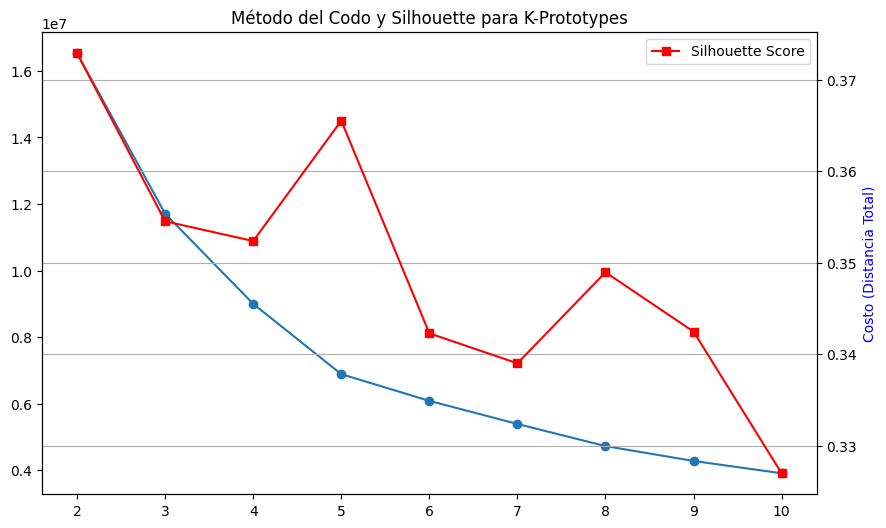

Número de clusters: 2, Costo: 16529788.41, Silhouette Score: 0.37290350290634244
Número de clusters: 3, Costo: 11707133.28, Silhouette Score: 0.35452638726870456
Número de clusters: 4, Costo: 8998974.67, Silhouette Score: 0.3523670374392338
Número de clusters: 5, Costo: 6886260.79, Silhouette Score: 0.36552623894979436
Número de clusters: 6, Costo: 6083036.46, Silhouette Score: 0.3422710588644192
Número de clusters: 7, Costo: 5388869.67, Silhouette Score: 0.3389898800880574
Número de clusters: 8, Costo: 4724318.19, Silhouette Score: 0.3489507956419718
Número de clusters: 9, Costo: 4276982.95, Silhouette Score: 0.3424554989972317
Número de clusters: 10, Costo: 3906960.56, Silhouette Score: 0.3269625955319285


In [ ]:
# Install required libraries if needed (run in your environment)
# !pip install pandas numpy kmodes matplotlib seaborn scikit-learn cuml-cu12 cudf-cu12

import pandas as pd
import numpy as np
from kmodes.kprototypes import KPrototypes
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score
import cudf  # Para GPU (opcional con cuML)

# Load the Spotify dataset
url = "https://raw.githubusercontent.com/gabminamedez/spotify-data/master/data.csv"
df = pd.read_csv(url)

# Prepare data for K-Prototypes
cols = [
    'artists', 'acousticness', 'danceability', 'energy',
    'instrumentalness', 'liveness', 'loudness', 'speechiness',
    'tempo', 'valence', 'mode', 'key', 'popularity', 'explicit'
]
data = df[cols].copy()

# Ensure types
data['artists'] = data['artists'].astype(str)
data['mode'] = data['mode'].astype(str)
data['explicit'] = data['explicit'].astype(str)
data['key'] = data['key'].astype(str)

# Fill nulls for numerical columns
data = data.fillna(data.median(numeric_only=True))

# Get categorical indices
categorical_columns = ['artists', 'mode', 'key', 'explicit']
categorical_index = [data.columns.get_loc(col) for col in categorical_columns]

# Enhanced function to calculate cost with multiprocessing and optional subsampling
def calculate_cost(data, categorical_index, k_range, sample_size=None, n_jobs=-1):
    """
    Calcula el costo (inertia-like) para diferentes números de clusters usando K-Prototypes.

    Parameters:
    - data: DataFrame con los datos
    - categorical_index: Lista de índices de columnas categóricas
    - k_range: Rango de número de clusters a probar
    - sample_size: Opcional, tamaño de submuestra para acelerar (e.g., 10000)
    - n_jobs: Número de jobs para paralelización (-1 usa todos los cores)

    Returns:
    - costs: Lista de costos por k
    - sil_scores: Lista de scores de Silhouette (si aplica)
    """
    costs = []
    sil_scores = []  # Para validar clusters

    # Submuestreo si se especifica
    if sample_size and sample_size < len(data):
        data_sample = data.sample(n=sample_size, random_state=42)
        cat_indices = [categorical_index[i] for i in range(len(categorical_index))
                       if categorical_index[i] < len(data_sample.columns)]
    else:
        data_sample = data
        cat_indices = categorical_index

    for k in k_range:
        # Configura KPrototypes con multiprocessing
        kproto = KPrototypes(
            n_clusters=k,
            init='Huang',
            n_init=5,
            verbose=0,
            random_state=42,
            n_jobs=n_jobs  # Paralelización en CPU
        )
        # Ajusta y calcula costo
        clusters = kproto.fit_predict(data_sample, categorical=cat_indices)
        costs.append(kproto.cost_)

        # Calcula Silhouette Score (solo para numéricas por simplicidad)
        num_data = data_sample.drop(columns=categorical_columns).fillna(0).to_numpy()
        if k > 1:  # Silhouette requiere al menos 2 clusters
            sil_score = silhouette_score(num_data, clusters)
            sil_scores.append(sil_score)
        else:
            sil_scores.append(None)

    return costs, sil_scores

# Define range of clusters to test
k_range = range(2, 11)  # Empieza en 2 para Silhouette

# Calculate costs and silhouette scores
costs, sil_scores = calculate_cost(data, categorical_index, k_range, sample_size=20000, n_jobs=-1)

# Plot Elbow Curve with Silhouette
plt.figure(figsize=(10, 6))
plt.plot(k_range, costs, marker='o', label='Costo (Distancia Total)')
if any(sil_scores):  # Si hay scores válidos
    plt.twinx()
    plt.plot(k_range, [s for s in sil_scores if s is not None], marker='s', color='r', label='Silhouette Score')
    plt.ylabel('Silhouette Score', color='r')
plt.title('Método del Codo y Silhouette para K-Prototypes')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Costo (Distancia Total)', color='b')
plt.grid(True)
plt.legend(loc='best')
plt.show()

# Print costs and silhouette scores for inspection
for k, cost, sil in zip(k_range, costs, sil_scores):
    print(f'Número de clusters: {k}, Costo: {cost:.2f}, Silhouette Score: {sil if sil is not None else "N/A"}')

In [ ]:
import pickle
from kmodes.kprototypes import KPrototypes

# Entrena el modelo definitivo
kproto_final = KPrototypes(
    n_clusters=5,
    init='Huang',
    n_init=5,
    verbose=1,
    random_state=42
)
clusters = kproto_final.fit_predict(data, categorical=categorical_index)

# Guardar el modelo
with open("kproto_5.pkl", "wb") as f:
    pickle.dump(kproto_final, f)

# Cargar después
with open("kproto_5.pkl", "rb") as f:
    loaded_model = pickle.load(f)

# Predecir en nuevos datos
# new_clusters = loaded_model.predict(new_data, categorical=categorical_index)


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 19620, ncost: 68773768.3843777
Run: 1, iteration: 2/100, moves: 13541, ncost: 65905047.785305545
Run: 1, iteration: 3/100, moves: 13118, ncost: 63076077.61343597
Run: 1, iteration: 4/100, moves: 12663, ncost: 60828528.375778444
Run: 1, iteration: 5/100, moves: 10573, ncost: 59457245.00209814
Run: 1, iteration: 6/100, moves: 7258, ncost: 58913485.81647804
Run: 1, iteration: 7/100, moves: 4465, ncost: 58731368.786971286
Run: 1, iteration: 8/100, moves: 2492, ncost: 58680828.72105334
Run: 1, iteration: 9/100, moves: 1236, ncost: 58668486.53446168
Run: 1, iteration: 10/100, moves: 687, ncost: 58664685.63659404
Run: 1, iteration: 11/100, moves: 343, ncost: 58663805.31540973
Run: 1, iteration: 12/100, moves: 152, ncost: 58663575.751037925
Run: 1, iteration: 13/100, moves: 107, ncost: 58663475.22946225
Run: 1, iteration: 14/100, moves: 39, ncost: 58663455.51707537
Run: 1, iteration

In [ ]:
# Agregar cluster al dataframe
data['cluster'] = clusters

# Guardar a CSV
data.to_csv("spotify_clusters_k5.csv", index=False)


In [ ]:
%%capture
!pip install spotipy gradio python-dotenv

In [ ]:
import os
from dotenv import load_dotenv

# Cargar archivo .env
load_dotenv()

client_id = os.getenv("SPOTIPY_CLIENT_ID")
client_secret = os.getenv("SPOTIPY_CLIENT_SECRET")

print("Client ID cargado:", client_id[:10] + "...")


Client ID cargado: 1b4e7eab85...


In [ ]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

sp = spotipy.Spotify(
    auth_manager=SpotifyClientCredentials(
        client_id=client_id,
        client_secret=client_secret
    )
)

# Probar
results = sp.search(q="Coldplay", type="track", limit=3)
for track in results['tracks']['items']:
    print(track['name'], "-", track['artists'][0]['name'])


Viva La Vida - Coldplay
A Sky Full of Stars - Coldplay
Sparks - Coldplay


In [ ]:
!pip install spotipy gradio

import gradio as gr
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import pickle

# Cargar tu modelo K-Prototypes previamente entrenado
with open("kproto_5.pkl", "rb") as f:
    model = pickle.load(f)

categorical_columns = ['artists', 'mode', 'key', 'explicit']

def get_categorical_index(df):
    return [df.columns.get_loc(col) for col in categorical_columns]

# Variable global para el cliente Spotify
sp = None

def set_credentials(client_id, client_secret):
    global sp
    try:
        auth_manager = SpotifyClientCredentials(
            client_id=client_id,
            client_secret=client_secret
        )
        sp = spotipy.Spotify(auth_manager=auth_manager)
        return "✅ Credenciales configuradas correctamente."
    except Exception as e:
        return f"❌ Error con las credenciales: {str(e)}"

def predict_cluster(song_query):
    global sp
    if sp is None:
        return "⚠️ Primero sube tus credenciales."
    try:
        results = sp.search(q=song_query, type="track", limit=1)
        if not results['tracks']['items']:
            return "❌ No encontré la canción en Spotify."

        track = results['tracks']['items'][0]
        features = sp.audio_features([track['id']])[0]

        if features is None:
            return "⚠️ No pude obtener las audio features de esta canción."

        song_data = {
            'artists': track['artists'][0]['name'],
            'acousticness': features['acousticness'],
            'danceability': features['danceability'],
            'energy': features['energy'],
            'instrumentalness': features['instrumentalness'],
            'liveness': features['liveness'],
            'loudness': features['loudness'],
            'speechiness': features['speechiness'],
            'tempo': features['tempo'],
            'valence': features['valence'],
            'mode': str(features['mode']),
            'key': str(features['key']),
            'popularity': track['popularity'],
            'explicit': str(track['explicit'])
        }

        song_df = pd.DataFrame([song_data])
        cat_index = get_categorical_index(song_df)
        cluster = model.predict(song_df, categorical=cat_index)

        return f"""
🎵 {track['name']} - {track['artists'][0]['name']}
📊 Popularidad: {track['popularity']}
🎯 Cluster asignado: {cluster[0]}
"""
    except Exception as e:
        return f"Error: {str(e)}"

# Interfaz Gradio
with gr.Blocks() as demo:
    gr.Markdown("## Spotify Clustering App 🎶")
    gr.Markdown("Primero ingresa tus credenciales de Spotify Developer:")

    with gr.Row():
        client_id_in = gr.Textbox(label="Client ID", type="password")
        client_secret_in = gr.Textbox(label="Client Secret", type="password")
    cred_button = gr.Button("Configurar credenciales")
    cred_output = gr.Textbox(label="Estado")

    gr.Markdown("---")
    gr.Markdown("Ahora ingresa el nombre de una canción para obtener su cluster:")

    song_in = gr.Textbox(label="Nombre de canción")
    song_button = gr.Button("Predecir cluster")
    song_output = gr.Textbox(label="Resultado")

    cred_button.click(set_credentials, inputs=[client_id_in, client_secret_in], outputs=cred_output)
    song_button.click(predict_cluster, inputs=song_in, outputs=song_output)

demo.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://1d5f45d70142c4239f.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
from spotipy.oauth2 import SpotifyClientCredentials
auth_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
token = auth_manager.get_access_token(as_dict=False)
print("Access token:", token)


In [ ]:
import requests

headers = {"Authorization": f"Bearer {token}"}
r = requests.get("https://api.spotify.com/v1/audio-features/0VjIjW4GLUZAMYd2vXMi3b", headers=headers)
print(r.status_code, r.json())


403 {'error': {'status': 403}}


In [ ]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

# Cargar dataset con clusters
df = pd.read_csv("/content/spotify_clusters_k5.csv")

# Definir columnas numéricas relevantes
features = ["danceability", "energy", "valence", "loudness", "tempo", "popularity"]
X = df[features]

# Calcular matriz de similitud coseno
similarity_matrix = cosine_similarity(X, X)

def recommend_songs(song_name, top_n=5):
    if song_name not in df['name'].values:
        return ["Canción no encontrada"]

    idx = df[df['name'] == song_name].index[0]
    sim_scores = list(enumerate(similarity_matrix[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    top_indices = [i for i, score in sim_scores[1:top_n+1]]

    return df.iloc[top_indices][["name", "artists", "cluster"]].values.tolist()


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

def recommend_songs(song_name, top_n=5):
    if song_name not in df['name'].values:
        return ["Canción no encontrada"]

    # Extraer vector de la canción seleccionada
    idx = df[df['name'] == song_name].index[0]
    song_vector = X.iloc[idx].values.reshape(1, -1)

    # Calcular similitud solo contra todas las demás canciones
    sim_scores = cosine_similarity(song_vector, X).flatten()

    # Ordenar por similitud
    sim_indices = sim_scores.argsort()[::-1][1:top_n+1]

    recs = df.iloc[sim_indices][["name", "artists", "cluster"]]
    return [f"{row['name']} - {row['artists']} (Cluster {row['cluster']})" for _, row in recs.iterrows()]


In [ ]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

# 1. Cargar dataset
df = pd.read_csv("/content/spotify_clusters_k5.csv")

# 2. Definir columnas numéricas para similitud
features = ["danceability", "energy", "valence", "loudness", "tempo", "popularity"]
X = df[features]

# 3. Función de recomendación bajo demanda
def recommend_songs(song_name, top_n=5):
    if song_name not in df['name'].values:
        return ["Canción no encontrada"]

    # Extraer vector de la canción seleccionada
    idx = df[df['name'] == song_name].index[0]
    song_vector = X.iloc[idx].values.reshape(1, -1)

    # Calcular similitud solo contra todas l


In [ ]:
print(df.columns)


Index(['artists', 'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'mode',
       'key', 'popularity', 'explicit', 'cluster'],
      dtype='object')


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

features = ["danceability", "energy", "valence", "loudness", "tempo", "popularity"]
X = df[features]

def recommend_songs(artist_name, top_n=5):
    if artist_name not in df['artists'].values:
        return ["Artista no encontrado"]

    # Tomar la primera canción del artista
    idx = df[df['artists'] == artist_name].index[0]
    song_vector = X.iloc[idx].values.reshape(1, -1)

    sim_scores = cosine_similarity(song_vector, X).flatten()
    sim_indices = sim_scores.argsort()[::-1][1:top_n+1]

    recs = df.iloc[sim_indices][["artists", "cluster"]]
    return [f"{row['artists']} (Cluster {row['cluster']})" for _, row in recs.iterrows()]


In [ ]:
print(df['artists'].head())  # Para ver ejemplos
print(recommend_songs(df['artists'].iloc[0], top_n=5))


0                         ['Carl Woitschach']
1    ['Robert Schumann', 'Vladimir Horowitz']
2                     ['Seweryn Goszczyński']
3                        ['Francisco Canaro']
4    ['Frédéric Chopin', 'Vladimir Horowitz']
Name: artists, dtype: object
["['Francisco Canaro'] (Cluster 4)", "['Francisco Canaro', 'Charlo'] (Cluster 4)", "['Francisco Canaro', 'Charlo'] (Cluster 4)", "['Francisco Canaro', 'Charlo'] (Cluster 4)", "['Νανά Γκρέκα', 'Κυριάκος Αγορίδης'] (Cluster 4)"]


In [ ]:
# Ejemplo con alguna canción de tu dataset
print(recommend_songs("The Weeknd", top_n=5))


['Artista no encontrado']


In [ ]:
df_original = pd.read_csv("https://raw.githubusercontent.com/gabminamedez/spotify-data/master/data.csv")  # dataset original con 'name', 'artists', etc.
df_clusters = pd.read_csv("/content/spotify_clusters_k5.csv")

# Unir por 'artists' + alguna otra columna (ej. 'loudness', 'energy'...) o por 'id' si lo tienes
df = df_original.merge(df_clusters, on=["artists"], how="inner")


In [ ]:
# Limpiar columna 'artists' en df_clusters
df_clusters['artists'] = (
    df_clusters['artists']
    .str.strip("[]")        # quitar corchetes
    .str.replace("'", "")   # quitar comillas simples
    .str.split(",")         # separar por coma
    .str[0]                 # quedarnos solo con el primer artista
    .str.strip()            # quitar espacios extra
)


In [ ]:
# Normalizar artistas en ambos datasets
df_original['artists'] = df_original['artists'].str.strip().str.lower()
df_clusters['artists'] = df_clusters['artists'].str.strip("[]").str.replace("'", "").str.split(",").str[0].str.strip().str.lower()


In [ ]:
df_original = pd.read_csv("https://raw.githubusercontent.com/gabminamedez/spotify-data/master/data.csv")
df_clusters = pd.read_csv("/content/spotify_clusters_k5.csv")

# Limpiar 'artists' en df_clusters
df_clusters['artists'] = (
    df_clusters['artists']
    .str.strip("[]")
    .str.replace("'", "")
    .str.split(",")
    .str[0]
    .str.strip()
)

# Hacer el merge
df = df_original.merge(df_clusters, on="artists", how="inner")

print(df[['name','artists','cluster']].head())


Empty DataFrame
Columns: [name, artists, cluster]
Index: []


In [ ]:
print(len(set(df_original['artists']).intersection(set(df_clusters['artists']))))


0


In [ ]:
df_original

,id,name,artists,duration_ms,release_date,year,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,mode,key,popularity,explicit
0,6KbQ3uYMLKb5jDxLF7wYDD,Singende Bataillone 1. Teil,['Carl Woitschach'],158648,1928,1928,0.9950,0.708,0.1950,0.563000,0.1510,-12.428,0.0506,118.469,0.7790,1,10,0,0
1,6KuQTIu1KoTTkLXKrwlLPV,"Fantasiestücke, Op. 111: Più tosto lento","['Robert Schumann', 'Vladimir Horowitz']",282133,1928,1928,0.9940,0.379,0.0135,0.901000,0.0763,-28.454,0.0462,83.972,0.0767,1,8,0,0
2,6L63VW0PibdM1HDSBoqnoM,Chapter 1.18 - Zamek kaniowski,['Seweryn Goszczyński'],104300,1928,1928,0.6040,0.749,0.2200,0.000000,0.1190,-19.924,0.9290,107.177,0.8800,0,5,0,0
3,6M94FkXd15sOAOQYRnWPN8,Bebamos Juntos - Instrumental (Remasterizado),['Francisco Canaro'],180760,9/25/28,1928,0.9950,0.781,0.1300,0.887000,0.1110,-14.734,0.0926,108.003,0.7200,0,1,0,0
4,6N6tiFZ9vLTSOIxkj8qKrd,"Polonaise-Fantaisie in A-Flat Major, Op. 61","['Frédéric Chopin', 'Vladimir Horowitz']",687733,1928,1928,0.9900,0.210,0.2040,0.908000,0.0980,-16.829,0.0424,62.149,0.0693,1,11,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169904,4KppkflX7I3vJQk7urOJaS,Skechers (feat. Tyga) - Remix,"['DripReport', 'Tyga']",163800,5/15/20,2020,0.1730,0.875,0.4430,0.000032,0.0891,-7.461,0.1430,100.012,0.3060,1,1,75,1
169905,1ehhGlTvjtHo2e4xJFB0SZ,Sweeter (feat. Terrace Martin),"['Leon Bridges', 'Terrace Martin']",167468,6/8/20,2020,0.0167,0.719,0.3850,0.031300,0.1110,-10.907,0.0403,128.000,0.2700,1,8,64,0
169906,52eycxprLhK3lPcRLbQiVk,How Would I Know,"['Kygo', 'Oh Wonder']",180700,5/29/20,2020,0.5380,0.514,0.5390,0.002330,0.1080,-9.332,0.1050,123.700,0.1530,1,7,70,0
169907,3wYOGJYD31sLRmBgCvWxa4,I Found You,"['Cash Cash', 'Andy Grammer']",167308,2/28/20,2020,0.0714,0.646,0.7610,0.000000,0.2220,-2.557,0.0385,129.916,0.4720,1,1,70,0


In [ ]:
df_clusters

,artists,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,mode,key,popularity,explicit,cluster
0,Carl Woitschach,0.9950,0.708,0.1950,0.563000,0.1510,-12.428,0.0506,118.469,0.7790,1,10,0,0,4
1,Robert Schumann,0.9940,0.379,0.0135,0.901000,0.0763,-28.454,0.0462,83.972,0.0767,1,8,0,0,2
2,Seweryn Goszczyński,0.6040,0.749,0.2200,0.000000,0.1190,-19.924,0.9290,107.177,0.8800,0,5,0,0,4
3,Francisco Canaro,0.9950,0.781,0.1300,0.887000,0.1110,-14.734,0.0926,108.003,0.7200,0,1,0,0,4
4,Frédéric Chopin,0.9900,0.210,0.2040,0.908000,0.0980,-16.829,0.0424,62.149,0.0693,1,11,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169904,DripReport,0.1730,0.875,0.4430,0.000032,0.0891,-7.461,0.1430,100.012,0.3060,1,1,75,1,0
169905,Leon Bridges,0.0167,0.719,0.3850,0.031300,0.1110,-10.907,0.0403,128.000,0.2700,1,8,64,0,1
169906,Kygo,0.5380,0.514,0.5390,0.002330,0.1080,-9.332,0.1050,123.700,0.1530,1,7,70,0,1
169907,Cash Cash,0.0714,0.646,0.7610,0.000000,0.2220,-2.557,0.0385,129.916,0.4720,1,1,70,0,1


In [ ]:
# Limpiar 'artists' en df_original
df_original['artists'] = (
    df_original['artists']
    .str.strip("[]")         # quitar corchetes
    .str.replace("'", "")    # quitar comillas simples
    .str.split(",")          # separar por coma
    .str[0]                  # quedarse con el primer artista
    .str.strip()             # quitar espacios
)


In [ ]:
df = df_original.merge(df_clusters, on="artists", how="inner")
print(df[['name','artists','cluster']].head())
print(len(df))


                          name          artists  cluster
0  Singende Bataillone 1. Teil  Carl Woitschach        4
1  Singende Bataillone 1. Teil  Carl Woitschach        4
2  Singende Bataillone 1. Teil  Carl Woitschach        4
3  Singende Bataillone 1. Teil  Carl Woitschach        4
4  Singende Bataillone 1. Teil  Carl Woitschach        4
24916965


In [ ]:
print(len(set(df_original['artists']).intersection(set(df_clusters['artists']))))


19705


In [ ]:
print(df.columns.tolist())


['id', 'name', 'artists', 'duration_ms', 'release_date', 'year', 'acousticness_x', 'danceability_x', 'energy_x', 'instrumentalness_x', 'liveness_x', 'loudness_x', 'speechiness_x', 'tempo_x', 'valence_x', 'mode_x', 'key_x', 'popularity_x', 'explicit_x', 'acousticness_y', 'danceability_y', 'energy_y', 'instrumentalness_y', 'liveness_y', 'loudness_y', 'speechiness_y', 'tempo_y', 'valence_y', 'mode_y', 'key_y', 'popularity_y', 'explicit_y', 'cluster']


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Definimos las features del dataset original (con _x)
features = ["danceability_x", "energy_x", "valence_x",
            "loudness_x", "tempo_x", "popularity_x"]

X = df[features]

def recommend_songs(song_name, top_n=5):
    # Validar que la canción existe
    if song_name not in df['name'].values:
        return ["Canción no encontrada"]

    # Índice de la canción
    idx = df[df['name'] == song_name].index[0]
    song_vector = X.iloc[idx].values.reshape(1, -1)

    # Similaridad coseno contra todas
    sim_scores = cosine_similarity(song_vector, X).flatten()

    # Ordenar y sacar las más parecidas (excluyendo la misma)
    sim_indices = sim_scores.argsort()[::-1][1:top_n+1]

    # Recomendaciones
    recs = df.iloc[sim_indices][["name", "artists", "cluster"]]
    return [
        f"{row['name']} - {row['artists']} (Cluster {row['cluster']})"
        for _, row in recs.iterrows()
    ]

# Ejemplo
print(recommend_songs("Blinding Lights", top_n=5))


['Blinding Lights - The Weeknd (Cluster 3)', 'Blinding Lights - The Weeknd (Cluster 1)', 'Blinding Lights - The Weeknd (Cluster 1)', 'Blinding Lights - The Weeknd (Cluster 1)', 'Blinding Lights - The Weeknd (Cluster 0)']


In [ ]:
df_original.columns

Index(['id', 'name', 'artists', 'duration_ms', 'release_date', 'year',
       'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'mode',
       'key', 'popularity', 'explicit'],
      dtype='object')

In [ ]:
df_clusters.columns

Index(['artists', 'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'mode',
       'key', 'popularity', 'explicit', 'cluster'],
      dtype='object')

In [ ]:
from kmodes.kprototypes import KPrototypes

# 1. Definir columnas
num_features = ["danceability", "energy", "valence", "loudness", "tempo", "popularity"]
cat_features = ["mode", "key", "explicit"]

# 2. Crear dataset solo con estas columnas
X = df_original[num_features + cat_features]

# 3. Calcular índices categóricos en X
categorical_idx = [X.columns.get_loc(col) for col in cat_features]

# 4. Entrenar K-Prototypes
kproto = KPrototypes(n_clusters=5, random_state=42, n_init=5)
clusters = kproto.fit_predict(X, categorical=categorical_idx)

# 5. Crear df_clusters con id + cluster
df_clusters = df_original[["id"]].copy()
df_clusters["cluster"] = clusters

# 6. Merge limpio
df = df_original.merge(df_clusters, on="id", how="inner")

print(df[["name", "artists", "cluster"]].head())



                                            name              artists  cluster
0                    Singende Bataillone 1. Teil      Carl Woitschach        3
1       Fantasiestücke, Op. 111: Più tosto lento      Robert Schumann        4
2                 Chapter 1.18 - Zamek kaniowski  Seweryn Goszczyński        3
3  Bebamos Juntos - Instrumental (Remasterizado)     Francisco Canaro        3
4    Polonaise-Fantaisie in A-Flat Major, Op. 61      Frédéric Chopin        4


In [ ]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from kmodes.kprototypes import KPrototypes
import gradio as gr

# ==============================
# 1. Preparar los datos
# ==============================
num_features = ["danceability", "energy", "valence", "loudness", "tempo", "popularity"]
cat_features = ["mode", "key", "explicit"]

# Dataset con features
X = df_original[num_features + cat_features]

# Índices categóricos respecto a X
categorical_idx = [X.columns.get_loc(col) for col in cat_features]

# Entrenar K-Prototypes
kproto = KPrototypes(n_clusters=5, random_state=42, n_init=5)
clusters = kproto.fit_predict(X, categorical=categorical_idx)

# Guardar clusters junto con ID
df_clusters = df_original[["id"]].copy()
df_clusters["cluster"] = clusters

# Merge limpio
df = df_original.merge(df_clusters, on="id", how="inner")

# ==============================
# 2. Función de recomendación
# ==============================
def recommend_songs(song_name, top_n=5):
    if song_name not in df['name'].values:
        return ["Canción no encontrada"]

    # Extraer vector numérico de la canción
    idx = df[df['name'] == song_name].index[0]
    song_vector = df.loc[idx, num_features].values.reshape(1, -1)

    # Similaridad coseno solo en features numéricas
    sim_scores = cosine_similarity(song_vector, df[num_features]).flatten()

    # Excluir la misma canción
    df_candidates = df[df['name'] != song_name].copy()
    sim_scores = cosine_similarity(song_vector, df_candidates[num_features]).flatten()

    # Ordenar por similitud
    sim_indices = sim_scores.argsort()[::-1][:top_n]

    # Recomendaciones
    recs = df_candidates.iloc[sim_indices][["name", "artists", "cluster"]]
    return [f"{row['name']} - {row['artists']} (Cluster {row['cluster']})"
            for _, row in recs.iterrows()]

# ==============================
# 3. App con Gradio
# ==============================
def gradio_recommender(song_name):
    results = recommend_songs(song_name, top_n=5)
    return "\n".join(results)

song_list = df['name'].unique().tolist()

with gr.Blocks() as demo:
    gr.Markdown("## 🎵 Recomendador de Canciones con K-Prototypes")

    song_input = gr.Dropdown(choices=song_list, label="Selecciona una canción")
    output = gr.Textbox(label="Recomendaciones")

    btn = gr.Button("Recomendar")
    btn.click(fn=gradio_recommender, inputs=song_input, outputs=output)

demo.launch()


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://f6934c728bdd87ebde.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
%%capture
!pip install annoy

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# features numéricas
X_num = df[num_features].values

# matriz de similitud
similarity_matrix = cosine_similarity(X_num)

recommendations = {}
for i, song in enumerate(df['name']):
    sim_scores = list(enumerate(similarity_matrix[i]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:11]
    top_indices = [idx for idx, score in sim_scores]
    recommendations[song] = df.iloc[top_indices][['name','artists','cluster']].to_dict(orient="records")

# Guardar en parquet
recs_df = pd.DataFrame.from_dict(recommendations, orient="index")
recs_df.to_parquet("precomputed_recs.parquet")

print("Archivo guardado: precomputed_recs.parquet")


In [ ]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from annoy import AnnoyIndex
import gradio as gr

# ===============================
# 1. Cargar datos
# ===============================
num_features = ["danceability", "energy", "valence", "loudness", "tempo", "popularity"]

X = df[num_features].values

# ===============================
# 2. Precomputar recomendaciones (Opción 1)
# ===============================
def precompute_recs(top_n=10):
    similarity_matrix = cosine_similarity(X)
    recommendations = {}
    for i, song in enumerate(df['name']):
        sim_scores = list(enumerate(similarity_matrix[i]))
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:top_n+1]
        top_indices = [idx for idx, _ in sim_scores]
        recommendations[song] = df.iloc[top_indices][['name','artists','cluster']].to_dict(orient="records")
    recs_df = pd.DataFrame.from_dict(recommendations, orient="index")
    recs_df.to_parquet("precomputed_recs.parquet")
    return recs_df

# Generar una vez (puede tardar minutos)
# recs_df = precompute_recs()

# Luego cargar rápido
recs_df = pd.read_parquet("precomputed_recs.parquet")

# ===============================
# 3. Construir índice Annoy (Opción 2)
# ===============================
f = len(num_features)
annoy_index = AnnoyIndex(f, 'angular')

for i, vec in enumerate(X):
    annoy_index.add_item(i, vec)

annoy_index.build(10)
annoy_index.save('annoy_index.ann')

# ===============================
# 4. Funciones de recomendación
# ===============================
def recommend_precomputed(song_name, top_n=5):
    if song_name not in recs_df.index:
        return ["Canción no encontrada"]
    recs = recs_df.loc[song_name].dropna().tolist()[:top_n]
    return [f"{r['name']} - {r['artists']} (Cluster {r['cluster']})" for r in recs]

def recommend_annoy(song_name, top_n=5):
    if song_name not in df['name'].values:
        return ["Canción no encontrada"]
    idx = df[df['name'] == song_name].index[0]
    neighbors = annoy_index.get_nns_by_item(idx, top_n+1)[1:]  # excluir la misma
    recs = df.iloc[neighbors][["name","artists","cluster"]]
    return [f"{row['name']} - {row['artists']} (Cluster {row['cluster']})"
            for _, row in recs.iterrows()]

# ===============================
# 5. App Gradio con opción
# ===============================
def recommend(song_name, method, top_n):
    if method == "Precomputado":
        return "\n".join(recommend_precomputed(song_name, top_n))
    else:
        return "\n".join(recommend_annoy(song_name, top_n))

song_list = df['name'].unique().tolist()

with gr.Blocks() as demo:
    gr.Markdown("## 🎵 Recomendador de Canciones")

    song_input = gr.Dropdown(choices=song_list, label="Selecciona una canción")
    method = gr.Radio(["Precomputado", "Annoy (rápido)"], label="Método de recomendación")
    top_n = gr.Slider(1, 10, value=5, step=1, label="Número de recomendaciones")

    output = gr.Textbox(label="Recomendaciones")

    btn = gr.Button("Recomendar")
    btn.click(fn=recommend, inputs=[song_input, method, top_n], outputs=output)

demo.launch()


NameError: name 'df' is not defined

In [ ]:
# Guardar dataset clusterizado
df.to_parquet("spotify_with_clusters.parquet")

# Guardar recomendaciones precalculadas
recs_df.to_parquet("precomputed_recs.parquet")

# Guardar índice Annoy
annoy_index.save("annoy_index.ann")


NameError: name 'recs_df' is not defined